In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
wf = pd.read_csv('sp500_stock_20_22_close_with_sector_wide_format.csv')

### Importing Seasonal and Trend Data

**Seasonal wide format dataframw**

In [3]:
seasonal_wf = pd.read_csv('seasonal_wf.csv')

**Trend wide format dataframe**

In [4]:
trend_wf = pd.read_csv('trend_wf.csv')

# PCA on Seasonal Data

**Extracting the seaonl data from wf_trend_seasonal data frame**

In [5]:
seasonal_wf_pca = seasonal_wf.copy()

In [6]:
seasonal_wf_pca.columns.values[1:] = ['seasonal_week_' + str(d).zfill(3) for d in range(1, 157+1)]

In [7]:
seasonal_wf_pca.head()

,symbol,seasonal_week_001,seasonal_week_002,seasonal_week_003,seasonal_week_004,seasonal_week_005,seasonal_week_006,seasonal_week_007,seasonal_week_008,seasonal_week_009,...,seasonal_week_148,seasonal_week_149,seasonal_week_150,seasonal_week_151,seasonal_week_152,seasonal_week_153,seasonal_week_154,seasonal_week_155,seasonal_week_156,seasonal_week_157
0,A,0.132425,0.231008,0.239357,0.219029,0.127188,0.121888,0.156934,0.139962,0.026580,...,0.190106,0.148570,0.296405,0.293345,0.359169,0.342541,0.341594,0.294978,0.327890,0.307202
1,AAL,0.380714,0.398995,0.436896,0.422276,0.411903,0.448729,0.463345,0.431969,0.196752,...,0.068877,0.103666,0.112075,0.081659,0.072296,0.043779,0.047852,0.024751,0.045842,-0.009071
2,AAP,0.182801,0.131443,0.124783,0.077148,-0.012730,0.002416,-0.006274,0.052110,0.005552,...,0.092490,0.045848,0.099266,-0.110642,-0.103115,-0.083386,-0.095732,-0.136133,-0.115239,-0.082183
3,AAPL,0.078592,0.033156,0.022567,0.076878,-0.005416,0.026091,0.028638,-0.037627,-0.192765,...,-0.029324,-0.239753,-0.117866,-0.053940,-0.103264,-0.097732,-0.091657,-0.219572,-0.239362,-0.197808
4,ABBV,0.082709,0.074825,0.070150,0.031608,-0.034068,0.085432,0.081686,0.084985,-0.006831,...,-0.140564,-0.175491,-0.148435,-0.116361,-0.086419,-0.052490,-0.042770,-0.058816,-0.028241,-0.042584


**Checking the correlation between seasonal weeks**

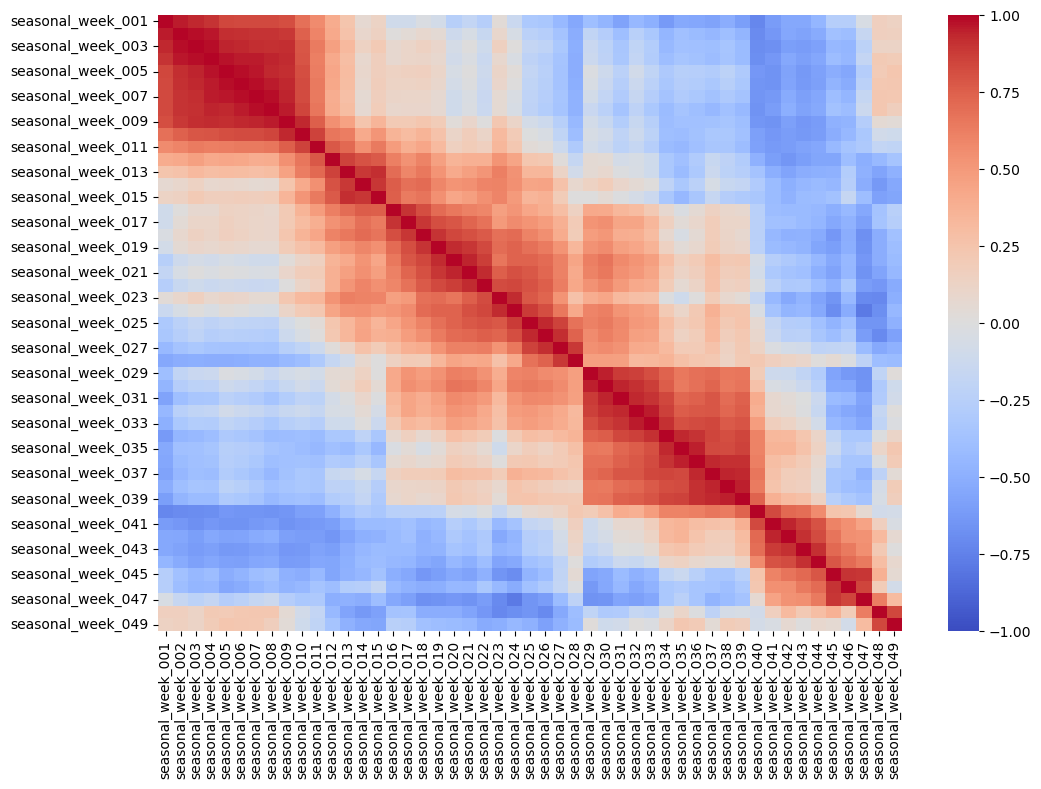

In [8]:
fig, ax = plt.subplots(figsize=(12,8))

sns.heatmap(data=seasonal_wf_pca.iloc[:,1:50].corr(),
           vmin=-1, vmax=1, center=0,
           cmap='coolwarm',
           ax=ax)

plt.show()

From the above figure we can see that the weeks closer to each other are correlated and the weeks that are more separated from each other looks anti-correlated. So there seems to be a good correlation structure to explore with the seasonal values

**Exploring the correlation structure with PCA**

In [9]:
from sklearn.decomposition import PCA

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
seasonal_wf_pca_ready = seasonal_wf_pca.select_dtypes('number').copy()

In [12]:
X_seasonal_ready = StandardScaler().fit_transform(seasonal_wf_pca_ready)

In [13]:
seasonal_pca_object = PCA().fit( X_seasonal_ready )

In [14]:
seasonal_pca_score = seasonal_pca_object.transform( X_seasonal_ready )

In [15]:
seasonal_pca_score.shape

(500, 157)

In [16]:
X_seasonal_ready

array([[-0.18655654,  0.23296714,  0.23467249, ...,  0.70343227,
         0.75694217,  0.86520735],
       [ 1.25128543,  1.07726808,  1.2568939 , ..., -0.06524776,
        -0.04562416, -0.18874335],
       [ 0.10517126, -0.26744511, -0.35822637, ..., -0.5228917 ,
        -0.50397973, -0.43238184],
       ...,
       [ 0.68543227,  0.52996602,  0.51443279, ...,  0.50744961,
         0.50750569,  0.72408545],
       [ 1.15822199,  0.94046764,  0.89063766, ..., -0.48361328,
        -0.40260771, -0.48213098],
       [-0.90309173, -0.86779689, -0.86918314, ..., -0.04204811,
         0.02500845,  0.17722223]])

In [17]:
seasonal_pca_score

array([[ 5.59399809e+00, -1.50178755e-01, -9.30916628e-01, ...,
         1.85721982e-03, -3.74700271e-16,  1.08246745e-15],
       [-1.25327776e+00,  1.71768117e-01,  5.99011005e+00, ...,
        -1.71599298e-03, -2.55394664e-15, -1.68094705e-15],
       [-8.93925607e-01, -1.62218440e+00, -2.98724729e+00, ...,
        -2.70311678e-03,  1.30624678e-15,  7.07767178e-16],
       ...,
       [ 2.65166043e+00,  2.69493414e+00,  3.93202716e+00, ...,
         9.91898868e-04,  5.18682319e-16, -1.52655666e-16],
       [-3.69303387e+00,  2.14324638e+00,  4.58084442e+00, ...,
        -3.88126280e-03, -1.29930788e-15,  2.49800181e-16],
       [ 1.48572791e+00, -5.87974852e-01, -6.12248938e+00, ...,
         5.20171338e-03,  9.33281230e-16,  2.74086309e-16]])

**PCA interpretation of the seasonal values**

**Screeplot**

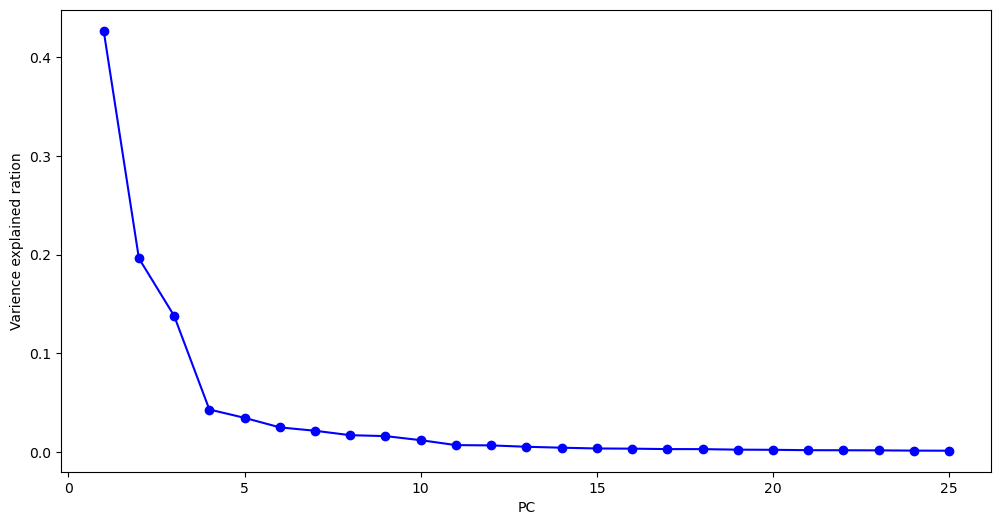

In [18]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(np.arange(len(seasonal_pca_object.explained_variance_ratio_[:25])) + 1,
        seasonal_pca_object.explained_variance_ratio_[:25], 'bo-')

ax.set_xlabel('PC')
ax.set_ylabel('Varience explained ration')

plt.show()

We can see that after 10 PCs the varience explained ratio becomes negligible.

**Checking the total varience explained**

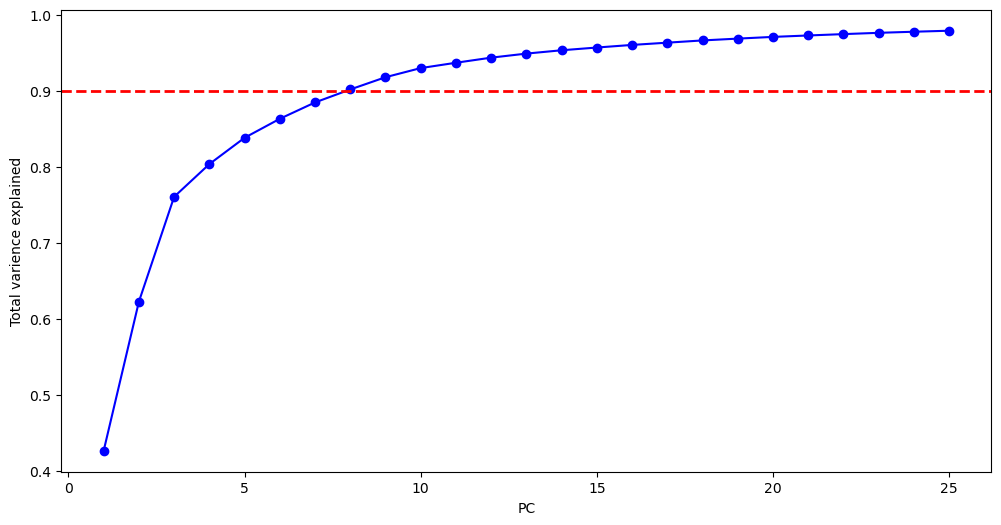

In [19]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(np.arange(len(seasonal_pca_object.explained_variance_ratio_.cumsum()[:25])) + 1,
        seasonal_pca_object.explained_variance_ratio_.cumsum()[:25],
        'bo-')

ax.axhline(y = 0.9, linestyle='--', linewidth=2, color='red')

ax.set_xlabel('PC')
ax.set_ylabel('Total varience explained')

plt.show()

We can see almost 90% of the varience is explained by 8 PCs

**Storing the PC scores to a dataframe**

In [20]:
pc_names = ['pc_' + str(d).zfill(3) for d in range(1, seasonal_pca_score.shape[1]+1)]

In [21]:
seasonal_pca_df = pd.DataFrame(seasonal_pca_score, columns=pc_names)

In [22]:
seasonal_pca_df.iloc[:, :10]

,pc_001,pc_002,pc_003,pc_004,pc_005,pc_006,pc_007,pc_008,pc_009,pc_010
0,5.593998,-0.150179,-0.930917,1.905572,0.297170,-0.638873,-0.132534,0.418474,0.044127,0.639266
1,-1.253278,0.171768,5.990110,-1.820409,0.502917,-2.328565,0.031107,0.236907,1.185017,-0.476852
2,-0.893926,-1.622184,-2.987247,-0.185828,-0.945681,0.069206,-0.369071,-0.440923,1.617023,0.157046
3,-1.401915,4.335138,-9.226556,-2.182805,-2.946217,-1.117405,-1.064532,-1.261734,0.645401,-0.934674
4,-4.889974,-3.192515,-0.220837,-0.461265,-2.457473,1.743027,-1.273095,-2.979279,-0.283861,-1.986071
...,...,...,...,...,...,...,...,...,...,...
495,1.044513,-0.504663,-0.938799,-0.184441,0.309582,-0.444617,-0.740993,-0.308796,-0.347915,0.396163
496,0.128238,-1.606917,0.448272,-0.591791,0.417693,-1.079334,0.610715,0.891350,0.813104,-0.399701
497,2.651660,2.694934,3.932027,1.981238,-1.267060,2.409119,-2.256182,-1.424662,-0.592787,0.651159
498,-3.693034,2.143246,4.580844,0.473263,-1.155531,-0.299964,-1.380903,0.368122,0.498545,-0.605504


**Boxplot showing the variability with each PC**

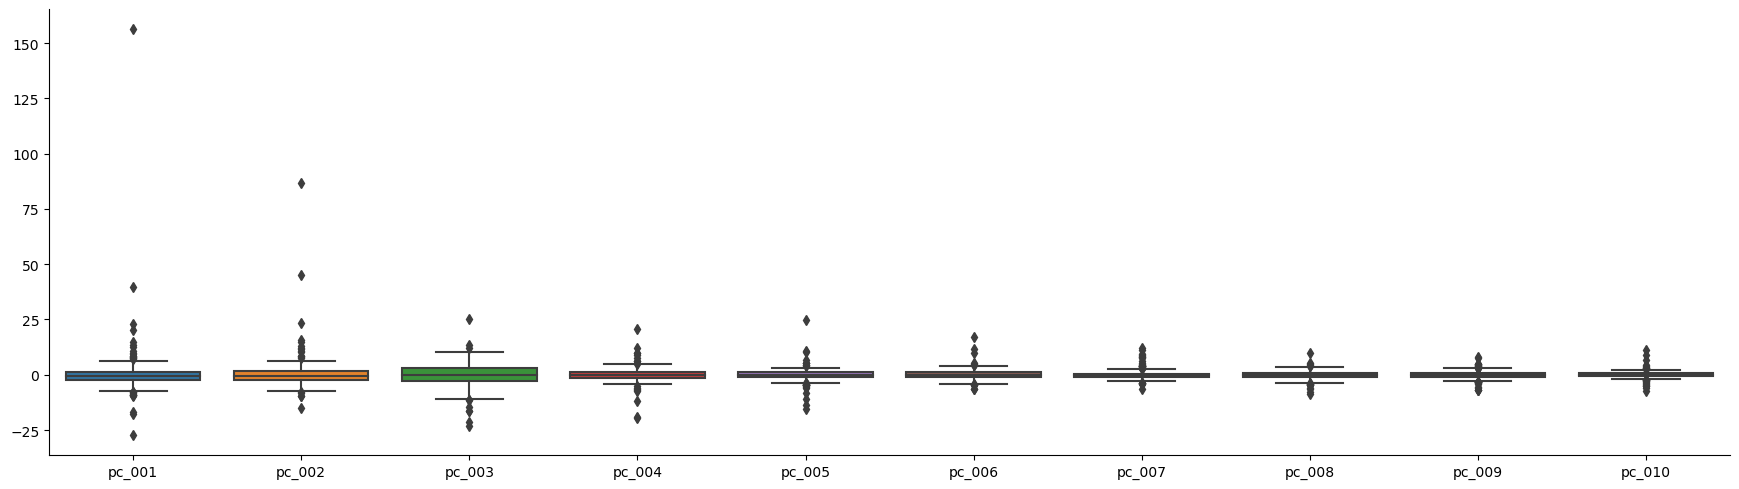

In [23]:
sns.catplot(data = seasonal_pca_df.iloc[:, :10], kind='box', aspect=3.5)

plt.show()

In [24]:
seasonal_pca_df['sector'] = wf.sector

In [25]:
seasonal_pca_df['symbol'] = wf.symbol

**Scatter plot for PC_001 v/s PC_002**

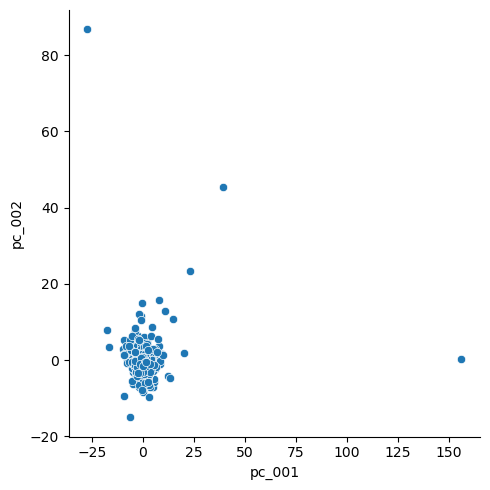

In [26]:
sns.relplot(data = seasonal_pca_df, x='pc_001', y='pc_002')

plt.show()

**Scatter plot for PC_001 v/s PC_002 grouped by sector**

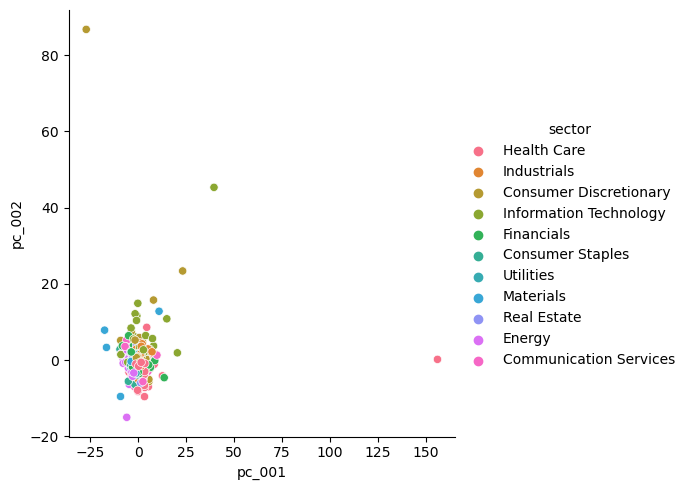

In [27]:
sns.relplot(data = seasonal_pca_df, x='pc_001', y='pc_002', hue='sector')

plt.show()

**Hierachical Clustering with Ward Method**

In [28]:
from scipy.cluster import hierarchy

In [29]:
seasonal_hclust_ward = hierarchy.ward( seasonal_pca_score )

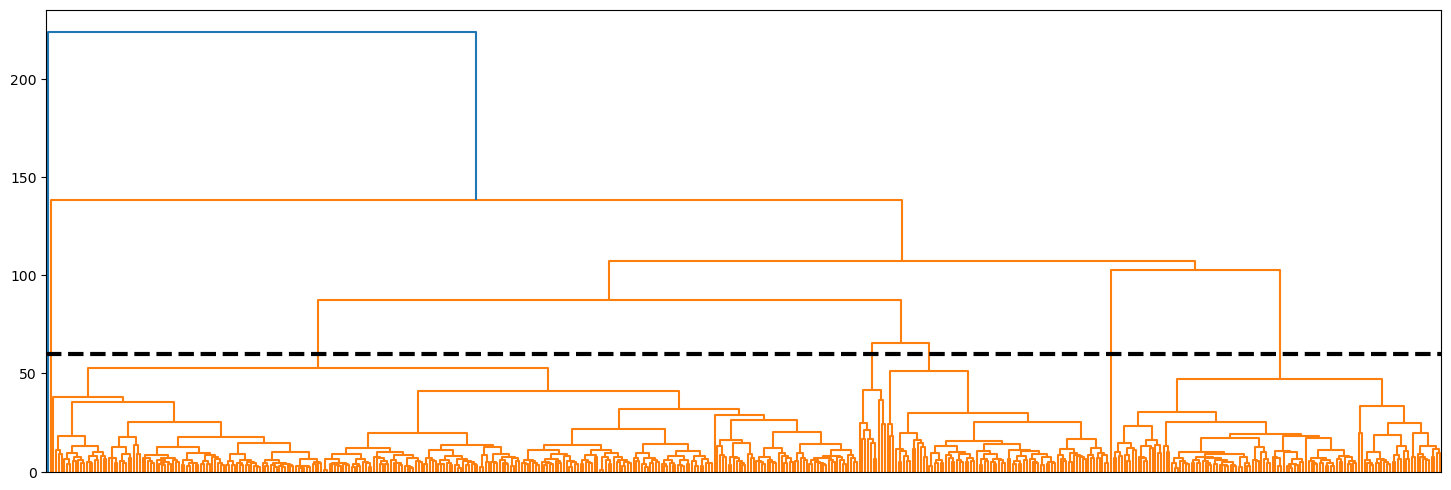

In [30]:
fig = plt.figure( figsize=(18,6) )

dn = hierarchy.dendrogram( seasonal_hclust_ward, no_labels=True )

plt.axhline(y=60, c='k', linestyle='--', linewidth=3)

plt.show()

**Cutting the tree with 7 clusters**

In [31]:
seasonal_ward_cut_7 = hierarchy.cut_tree( seasonal_hclust_ward, n_clusters=7 )

In [32]:
seasonal_ward_cut_7.ravel()

array([0, 1, 0, 2, 0, 0, 2, 0, 2, 2, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0,
       3, 1, 1, 0, 0, 1, 2, 2, 0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 2, 0, 1, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 2, 0, 3, 2, 0, 1, 2, 1, 0, 2, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 3, 2, 0, 0,
       1, 1, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 2, 0,
       2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 1, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 1,
       1, 2, 1, 2, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 1, 1, 0,
       1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0,
       1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 2, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 1, 2, 1, 1,

In [33]:
seasonal_pca_df['hclust_7'] = pd.Series(seasonal_ward_cut_7.ravel(), index=seasonal_pca_df.index)

seasonal_pca_df['hclust_7'] = seasonal_pca_df.hclust_7.astype('category')

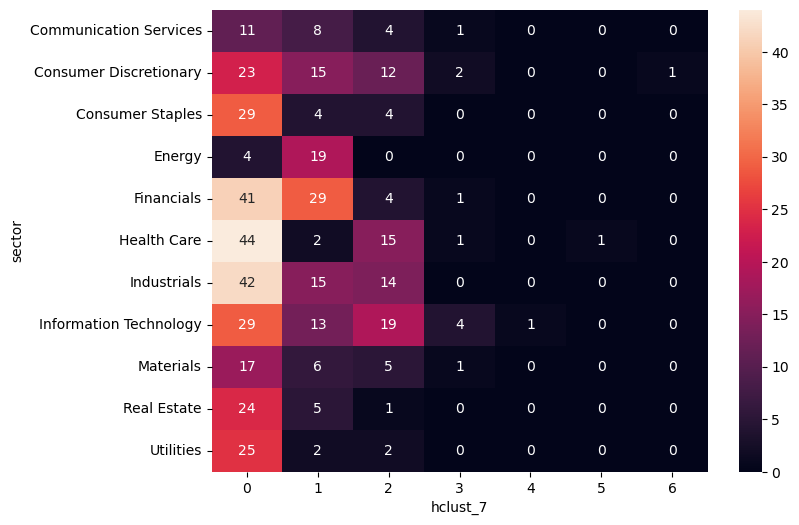

In [34]:
fig, ax = plt.subplots(figsize=(8,6))

sns.heatmap(pd.crosstab( seasonal_pca_df.sector, seasonal_pca_df.hclust_7, margins=False),
            annot=True, annot_kws={'size': 10})

plt.show()

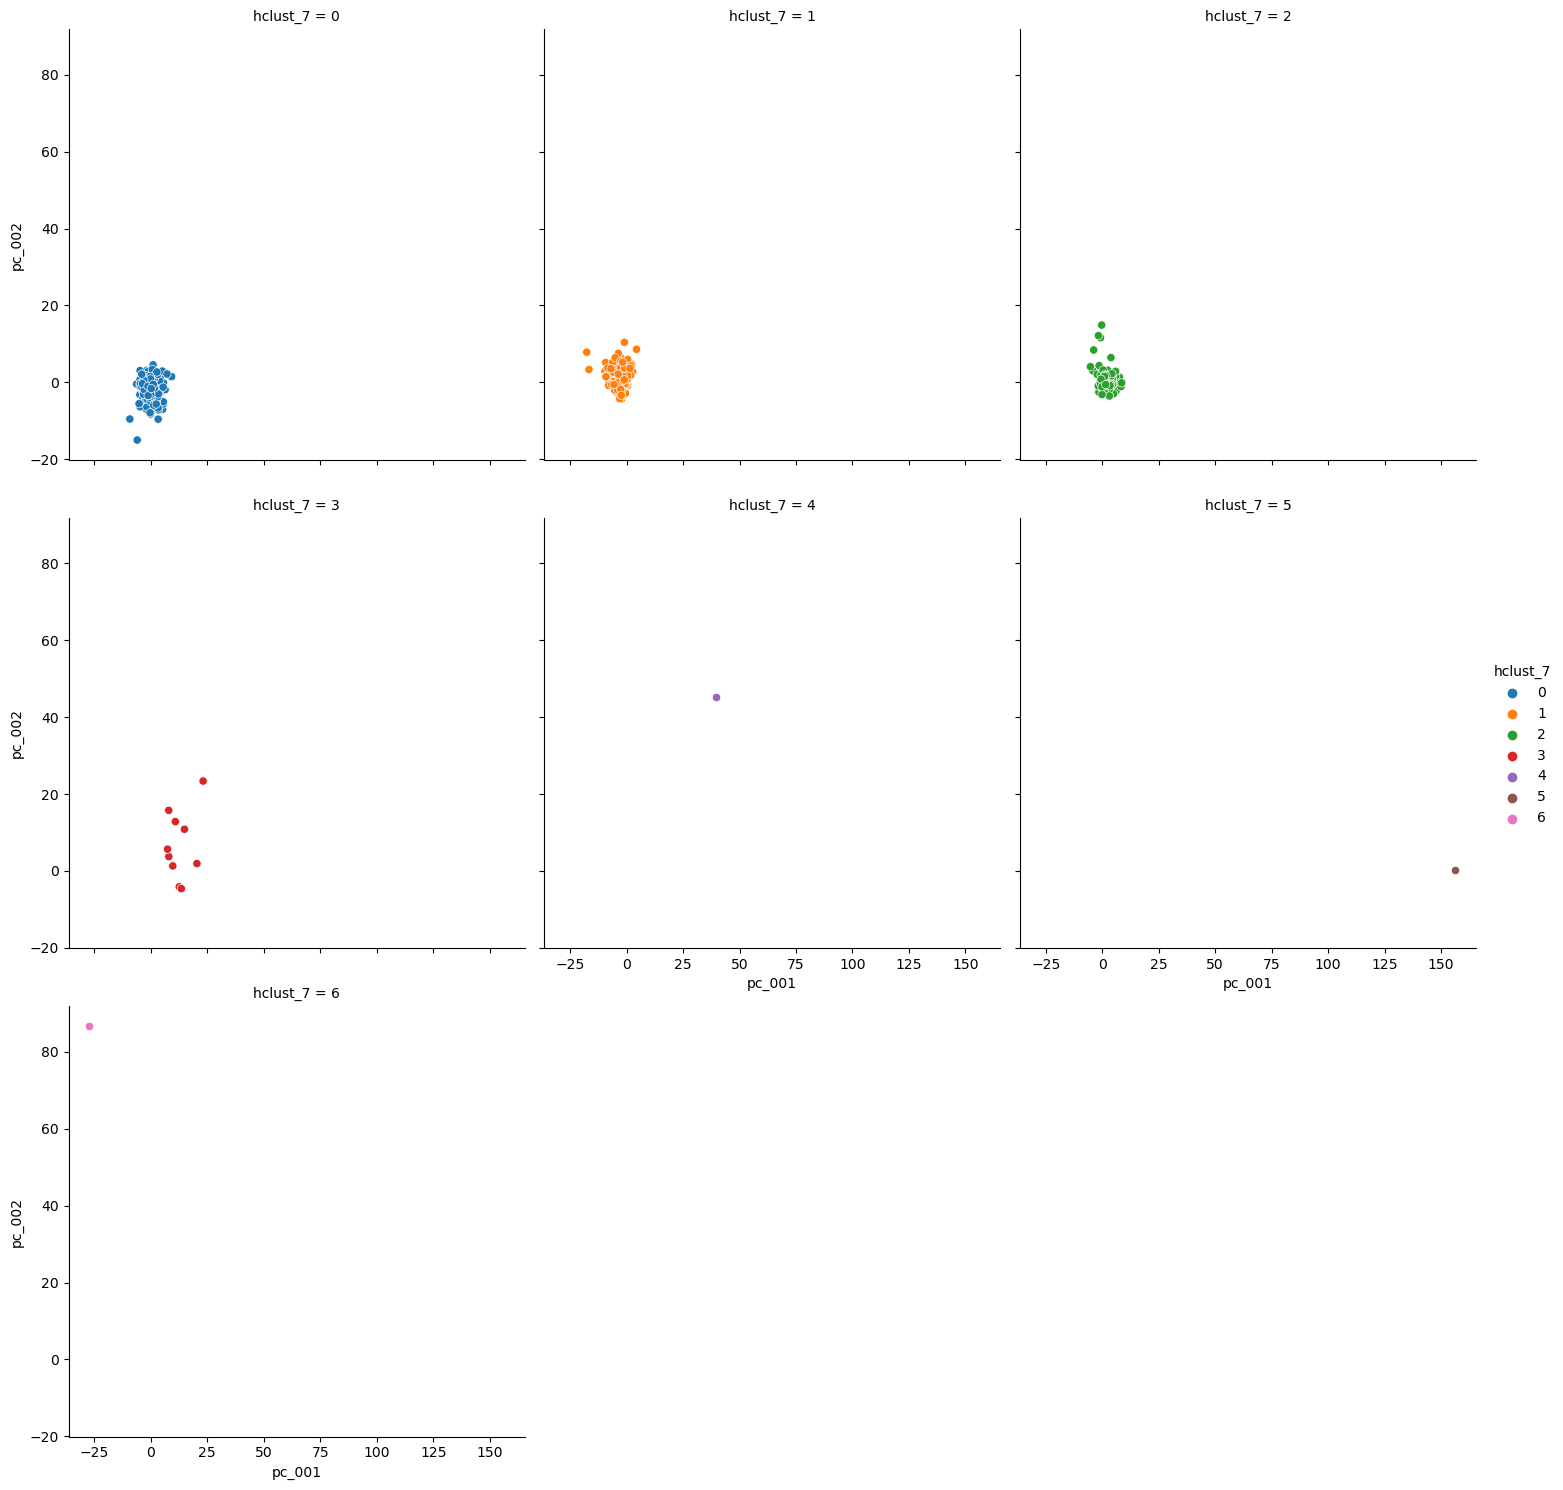

In [35]:
sns.relplot(data = seasonal_pca_df, x='pc_001', y='pc_002', hue='hclust_7', col='hclust_7', col_wrap=3)

plt.show()

From the above figure we can see that there is only one company each for cluster 4,5, and 6. 

Hence, we will use `cluster=0` and perform clustering again to try if we can segement company based on their sector.

Aslo, there are just few companies in `cluster=3`. We will check what companies are those.

**Checking the compines in `h_clust==3`**

In [36]:
seasonal_pca_df.loc[seasonal_pca_df.hclust_7 == 3].loc[:, ['symbol', 'sector']]

,symbol,sector
22,ALB,Materials
56,BBWI,Consumer Discretionary
84,CDAY,Information Technology
147,DXCM,Health Care
160,EPAM,Information Technology
168,ETSY,Consumer Discretionary
193,FSLR,Information Technology
328,NFLX,Communication Services
353,PAYC,Information Technology
383,PYPL,Financials


**Extracting the companies in `hclust_7==0` and performing clustering on just those companies**

In [37]:
cluster0_df = seasonal_pca_df.loc[seasonal_pca_df.hclust_7 == 0].copy()

In [38]:
cluster0_ready = cluster0_df.select_dtypes('number').copy()

In [39]:
X_cluster0 = StandardScaler().fit_transform(cluster0_ready)

In [40]:
cluster0_hclust_ward = hierarchy.ward( X_cluster0 )

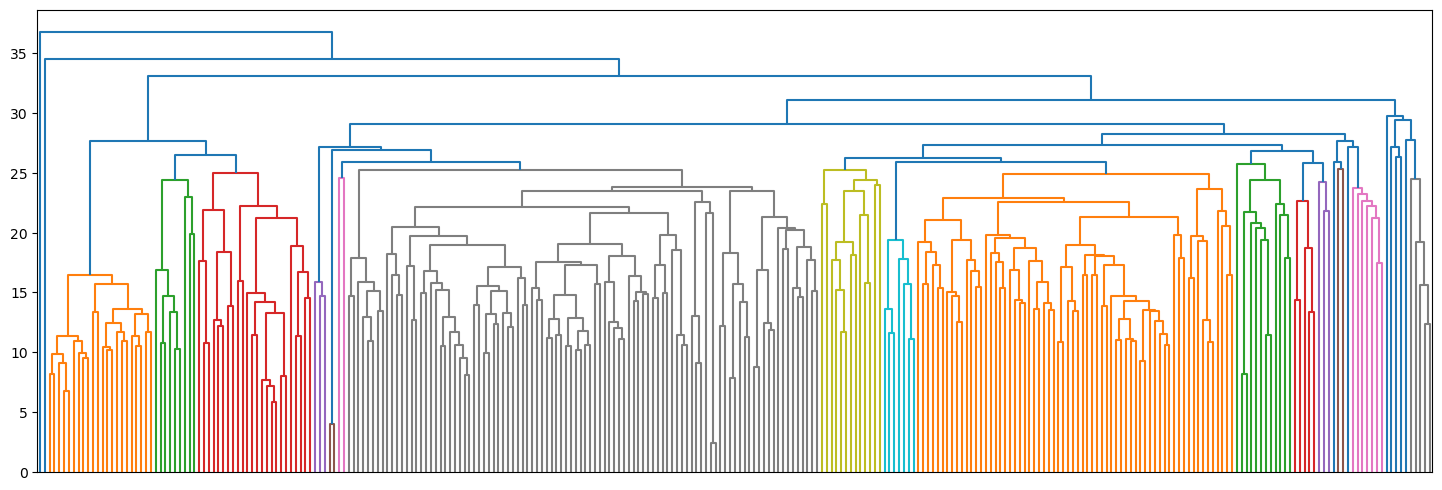

In [41]:
fig = plt.figure( figsize=(18,6) )

dn = hierarchy.dendrogram( cluster0_hclust_ward, no_labels=True )

plt.show()

We are celarly albe to identify several clusters. Hence we will cut the tree into 11 parts, same as the numebr of sectors in the data.

In [42]:
cluster0_ward_cut_11 = hierarchy.cut_tree( cluster0_hclust_ward, n_clusters=11 )

In [43]:
cluster0_ward_cut_11.ravel()

array([ 0,  0,  1,  1,  2,  0,  0,  3,  3,  1,  1,  0,  1,  0,  0,  1,  2,
        0,  1,  0,  0,  3,  0,  2,  2,  0,  1,  0,  1,  1,  4,  0,  1,  0,
        1,  0,  1,  1,  1,  0,  2,  1,  1,  2,  0,  2,  1,  0,  1,  1,  2,
        1,  1,  0,  1,  0,  3,  5,  3,  1,  1,  2,  0,  1,  0,  1,  1,  0,
        0,  0,  6,  2,  6,  0,  0,  0,  3,  3,  1,  6,  0,  4,  1,  3,  0,
        3,  0,  5,  0,  0,  2,  2,  7,  3,  2,  0,  3,  3,  1,  3,  0,  2,
        2,  0,  1,  1,  1,  1,  1,  1,  0,  8,  0,  1,  6,  0,  1,  1,  0,
        9,  1,  1,  0,  1,  1,  0,  0,  1,  1,  0,  1,  1,  1,  1,  5,  0,
        1,  0,  0,  0,  0,  2,  2,  0,  0,  0,  2,  6,  0,  0,  0,  0,  1,
        0,  1,  1,  0,  1,  1,  1,  0,  1,  2,  1,  1,  0,  1,  0,  6,  1,
        3,  0,  1,  0,  1,  2,  1,  0,  1,  1,  1,  1,  0,  0,  1,  0,  0,
        1,  5,  1,  0,  0,  0, 10,  3,  1,  0,  1,  0,  1,  0,  1,  0,  0,
        0,  0,  2,  3,  1,  1,  2,  0,  2,  1,  0,  3,  6,  0,  3,  1,  2,
        6,  0,  1,  2,  4

In [44]:
cluster0_df = cluster0_df.drop(['hclust_7'], axis=1)

In [45]:
cluster0_df['hclust_11'] = pd.Series(cluster0_ward_cut_11.ravel(), index=cluster0_df.index)

cluster0_df['hclust_11'] = cluster0_df.hclust_11.astype('category')

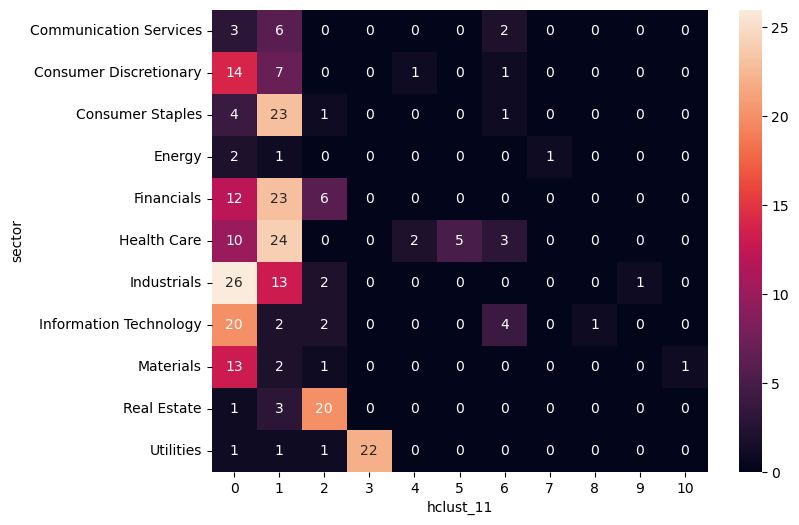

In [46]:
fig, ax = plt.subplots(figsize=(8,6))

sns.heatmap(pd.crosstab( cluster0_df.sector, cluster0_df.hclust_11, margins=False),
            annot=True, annot_kws={'size': 10})

plt.show()

From the above figure we are still not able to clearly distinguish each company's sector with each cluster except the utilities sector. We are clearly able to differentiate the utilities sector with `cluster==3`.

In [47]:
cluster0_df.loc[cluster0_df.hclust_11 == 3].loc[:, ['symbol', 'sector']]

,symbol,sector
14,AEE,Utilities
15,AEP,Utilities
44,ATO,Utilities
102,CMS,Utilities
104,CNP,Utilities
142,DTE,Utilities
143,DUK,Utilities
151,ED,Utilities
153,EIX,Utilities
164,ES,Utilities


In [48]:
seasonal_lf = seasonal_wf.melt(id_vars='symbol')

In [49]:
seasonal_lf[['seasonal_word', 'week_word', 'week_num']] = seasonal_lf.variable.str.split(pat='_', expand=True)

In [50]:
seasonal_lf.week_num = seasonal_lf.week_num.astype('int64')

In [51]:
cluster0_df_join = cluster0_df.loc[:, ['sector', 'symbol', 'hclust_11']].copy()

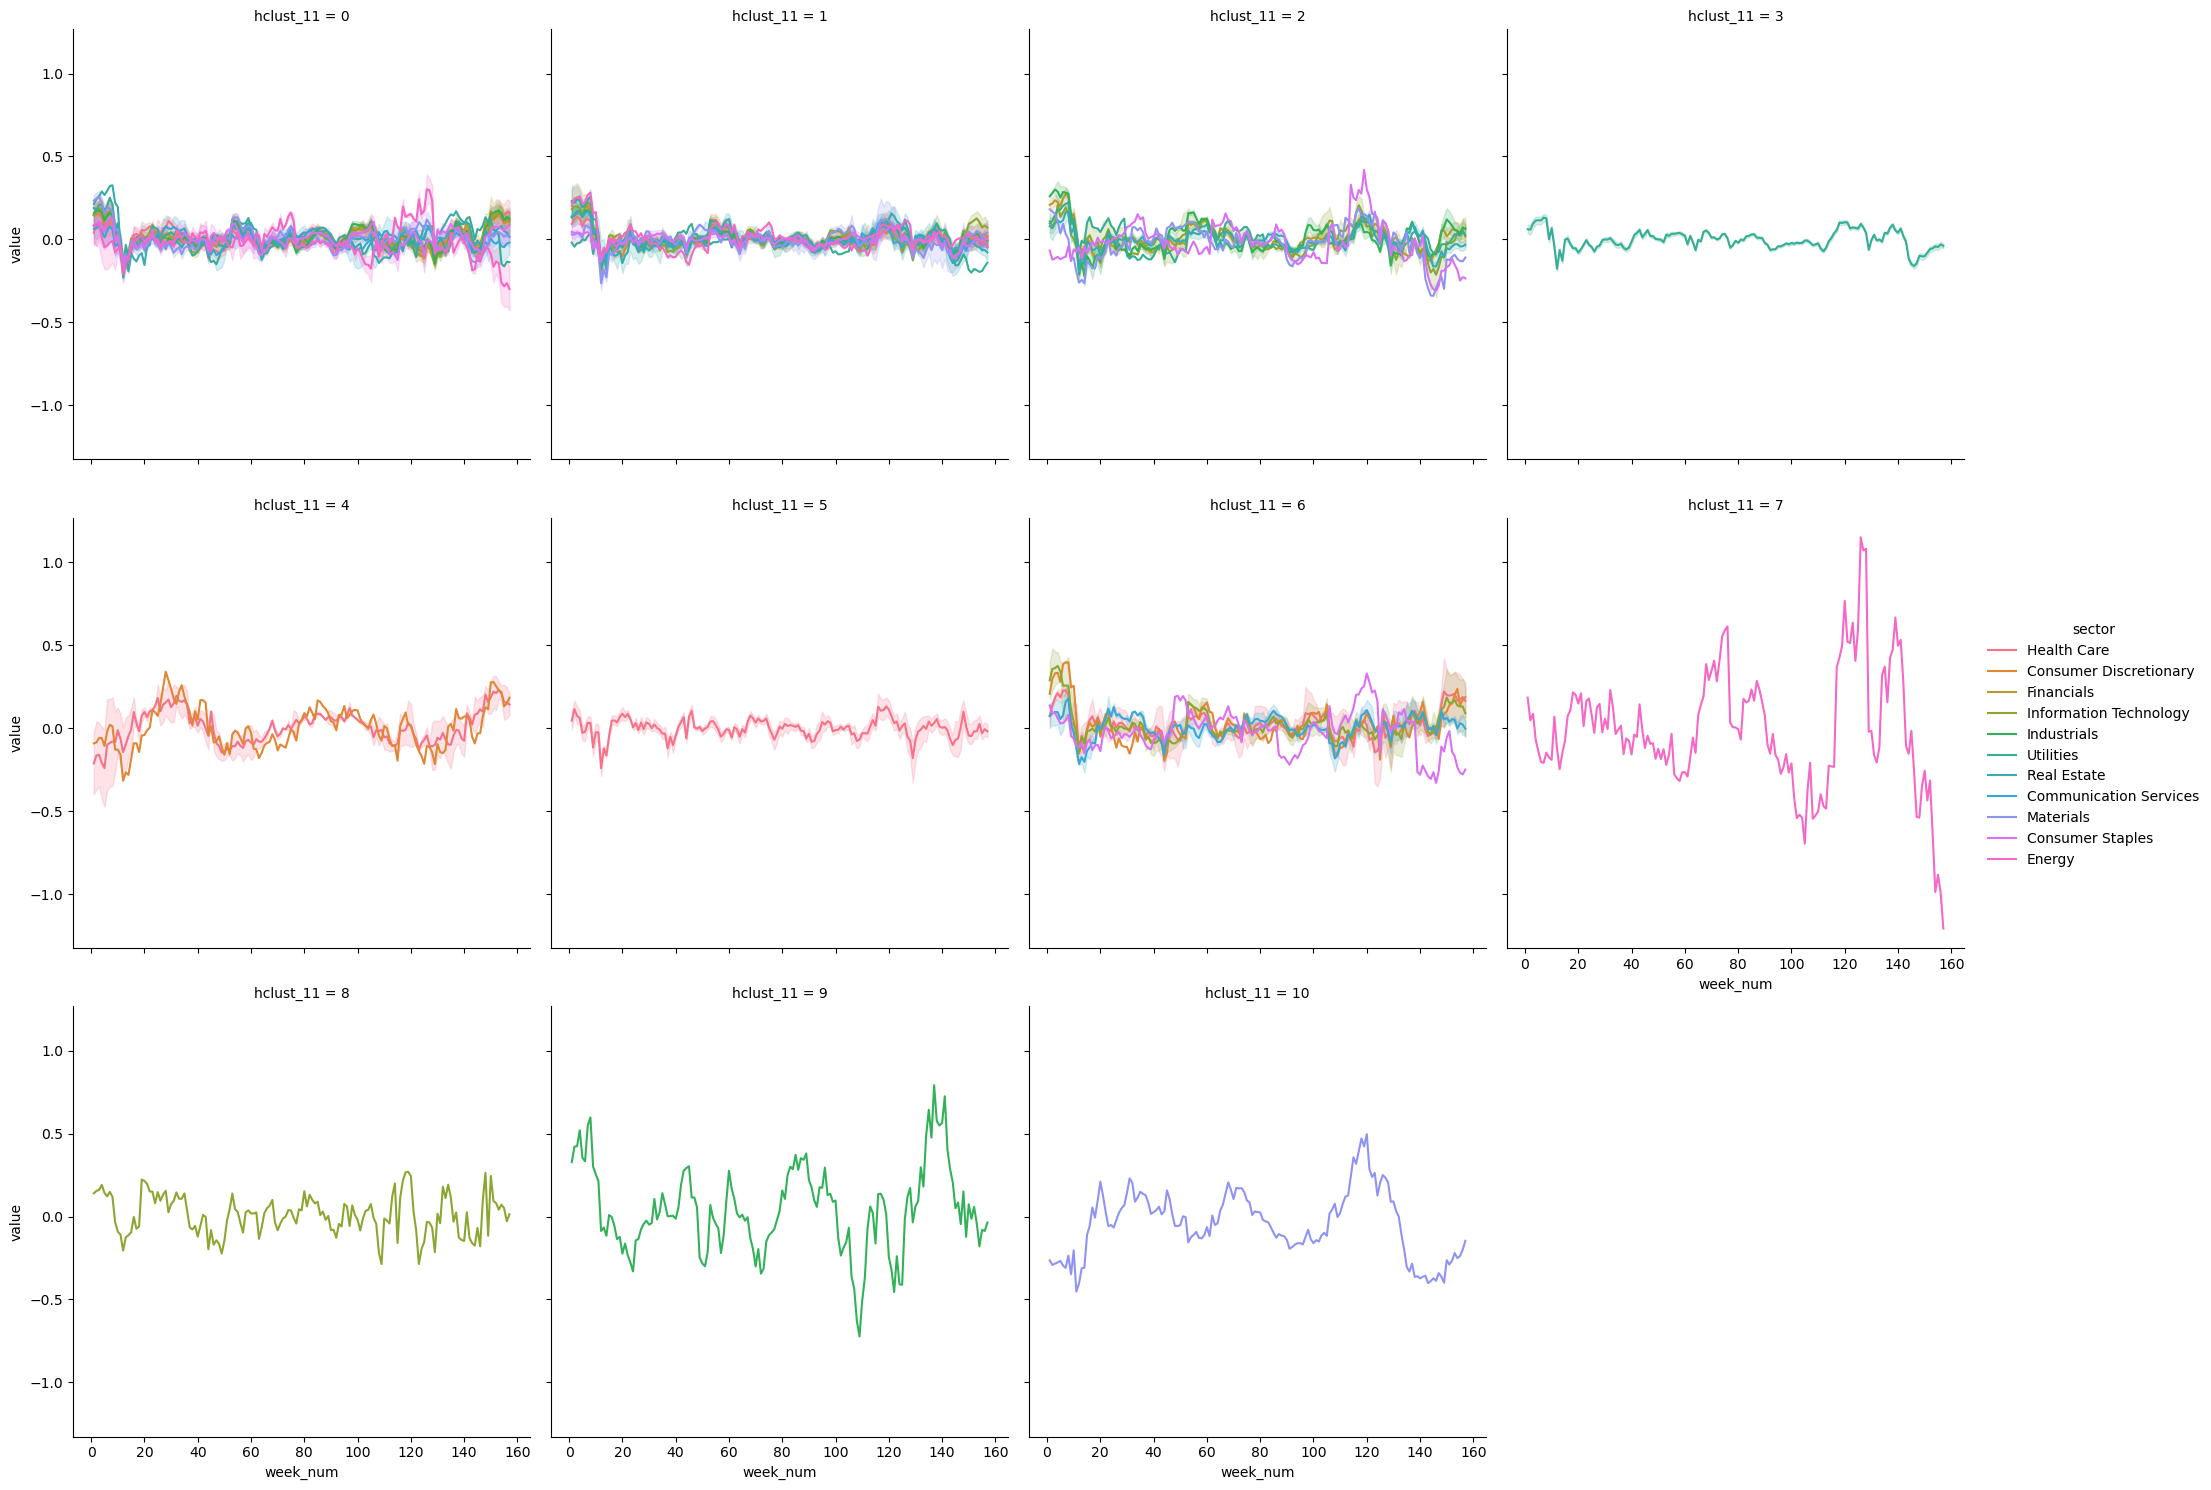

In [52]:
sns.relplot(data=seasonal_lf.merge(cluster0_df_join, on='symbol'), x='week_num', y='value',
            col='hclust_11', hue='sector', kind='line', col_wrap=4)

plt.show()

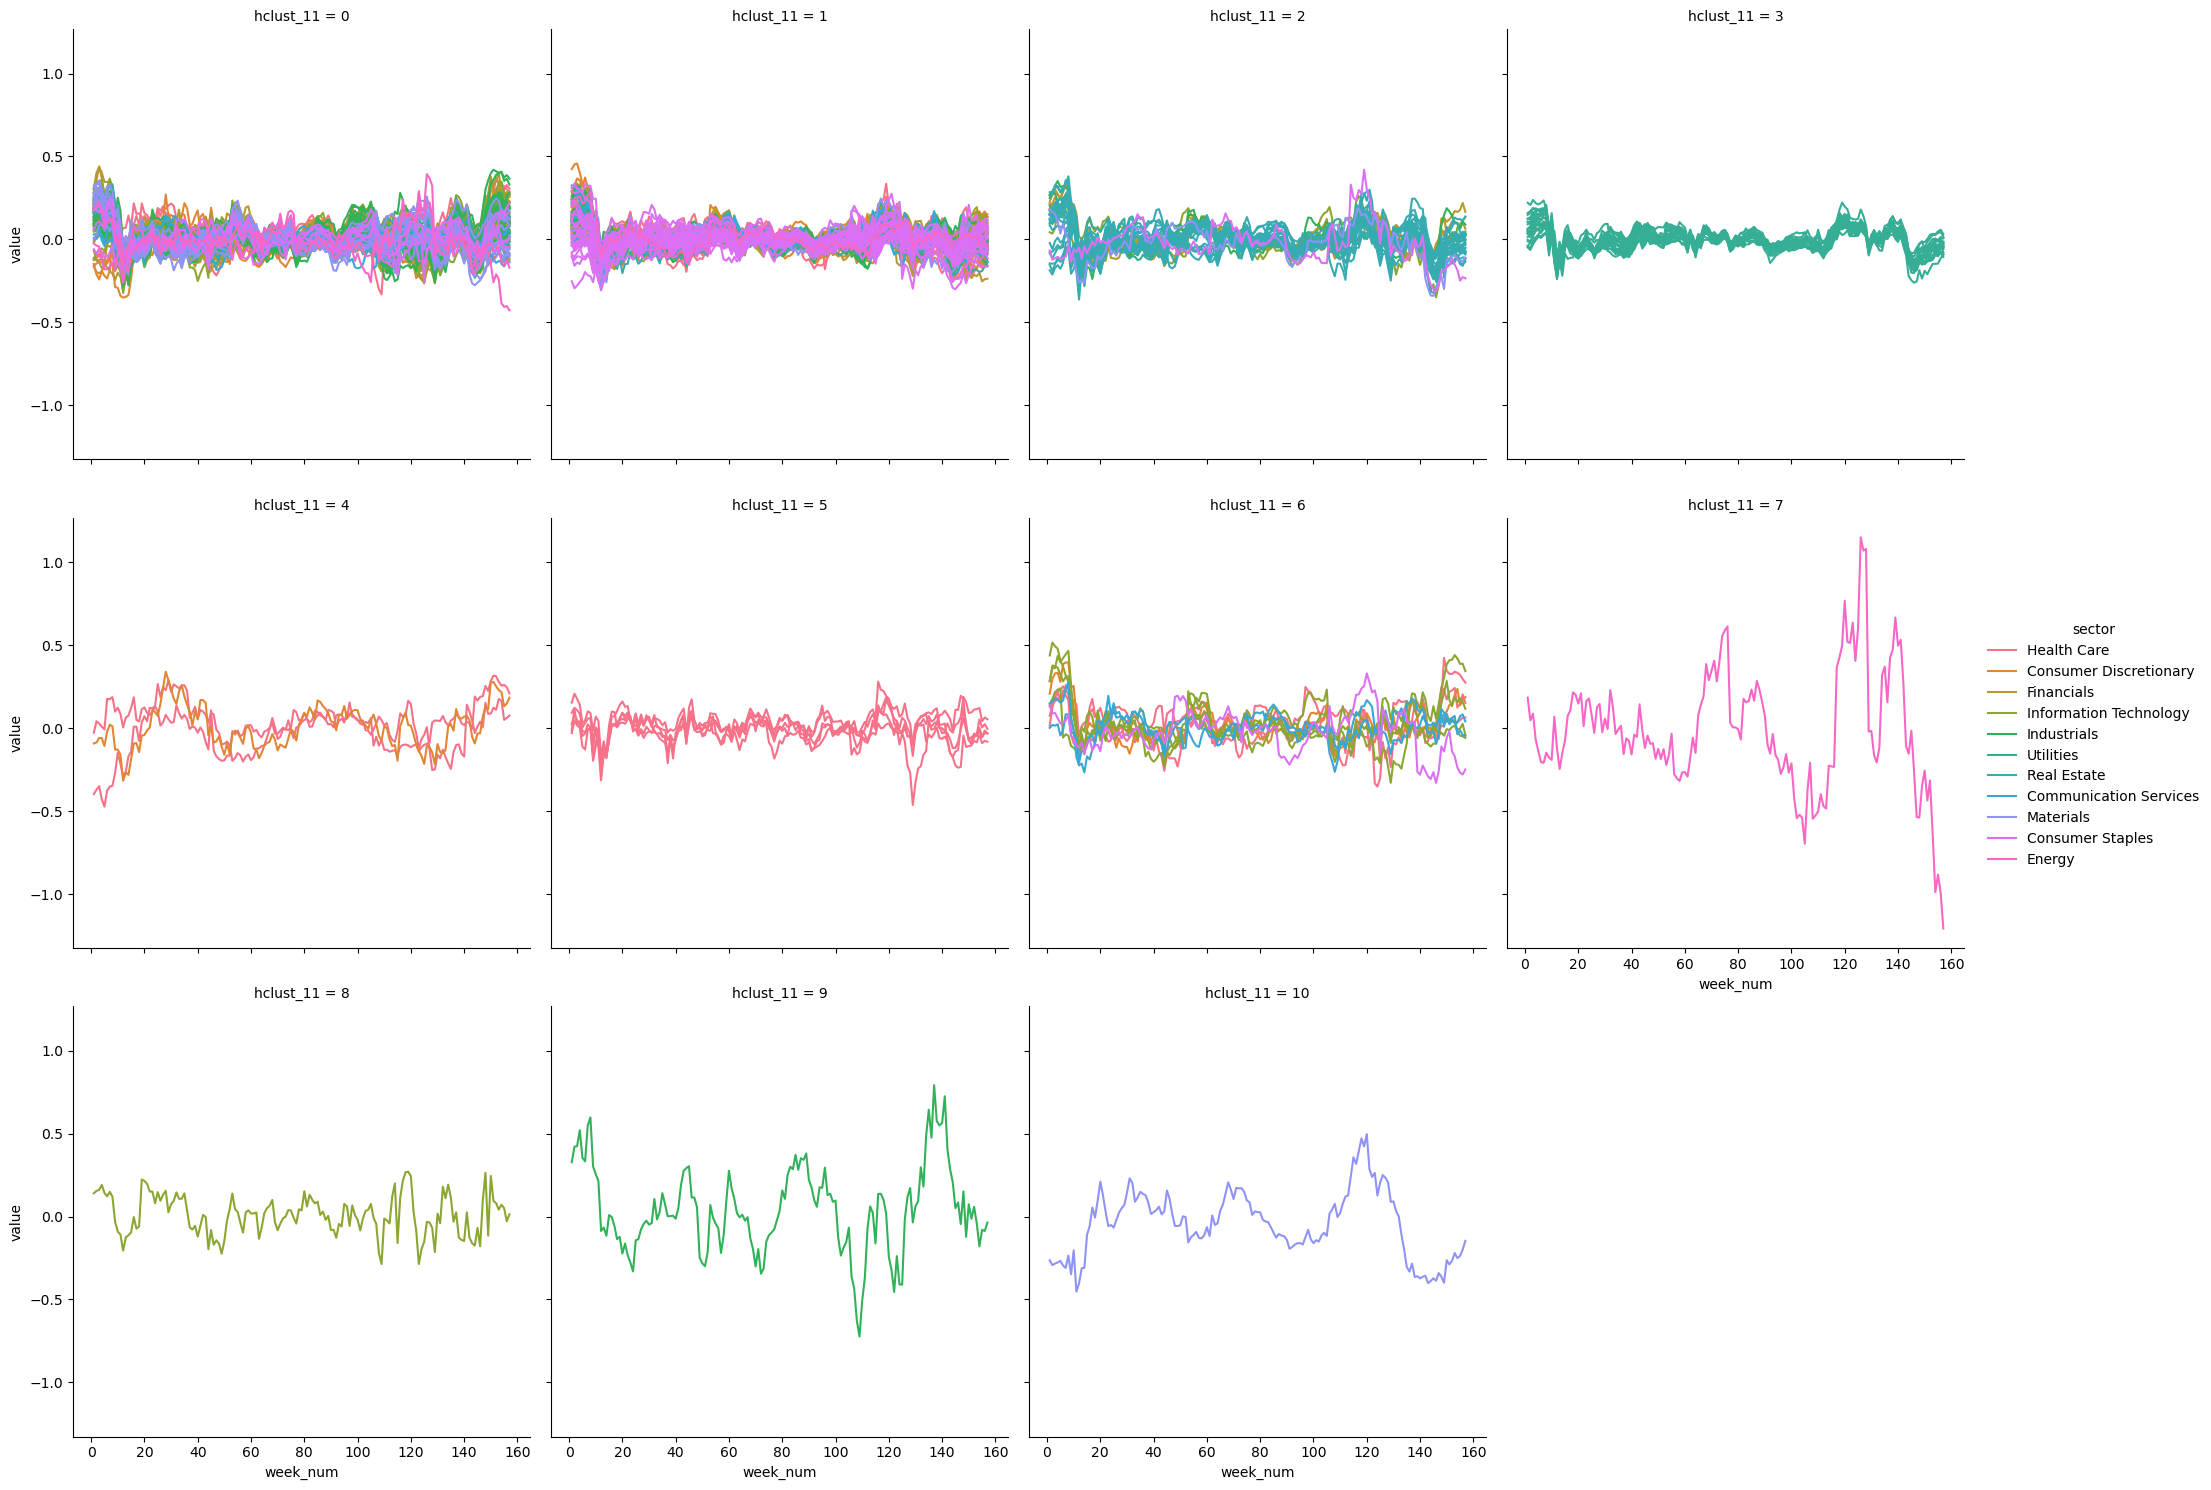

In [53]:
sns.relplot(data=seasonal_lf.merge(cluster0_df_join, on='symbol'), x='week_num', y='value',
            col='hclust_11', hue='sector', kind='line', col_wrap=4, units='symbol', estimator=None)

plt.show()

In [54]:
hclust_avg_df = seasonal_lf.merge(cluster0_df_join, on='symbol').\
                groupby(['hclust_11', 'week_num']).\
                aggregate(avg_seasonal_val = ('value', 'mean')).reset_index()

In [55]:
hclust_avg_df

,hclust_11,week_num,avg_seasonal_val
0,0,1,0.145409
1,0,2,0.166053
2,0,3,0.172162
3,0,4,0.158146
4,0,5,0.104971
...,...,...,...
1722,10,153,-0.220133
1723,10,154,-0.250607
1724,10,155,-0.237294
1725,10,156,-0.199226


In [56]:
pred_grid_ses = hclust_avg_df.pivot(index='hclust_11', columns='week_num', values='avg_seasonal_val').copy()

In [57]:
pred_grid_ses.reset_index(inplace=True)

In [58]:
pred_grid_ses.columns.values[1:]

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157], dtype=object)

In [59]:
pred_grid_ses.columns.values[1:] = [ 'seasonal_week_' + str(d).zfill(3) for d in range(1, 157+1)]

In [60]:
pred_grid_ses

week_num,hclust_11,seasonal_week_001,seasonal_week_002,seasonal_week_003,seasonal_week_004,seasonal_week_005,seasonal_week_006,seasonal_week_007,seasonal_week_008,seasonal_week_009,...,seasonal_week_148,seasonal_week_149,seasonal_week_150,seasonal_week_151,seasonal_week_152,seasonal_week_153,seasonal_week_154,seasonal_week_155,seasonal_week_156,seasonal_week_157
0,0,0.145409,0.166053,0.172162,0.158146,0.104971,0.132933,0.148344,0.138148,0.032057,...,0.054416,0.049900,0.117633,0.108649,0.122801,0.132492,0.114943,0.086617,0.100134,0.093484
1,1,0.113496,0.123134,0.135175,0.130316,0.102843,0.126861,0.137408,0.123490,0.013777,...,-0.000062,-0.026799,-0.013952,-0.011176,0.002398,0.015092,0.005441,-0.008702,0.006209,-0.003866
2,2,0.115009,0.106604,0.132549,0.145650,0.125024,0.147705,0.182848,0.178218,0.050962,...,-0.051698,-0.072385,-0.031603,-0.034350,-0.017338,-0.010256,-0.010674,-0.027577,-0.016361,-0.018214
3,3,0.061015,0.058983,0.095359,0.113674,0.115806,0.114625,0.131234,0.126915,0.001522,...,-0.098402,-0.102093,-0.101506,-0.079469,-0.058461,-0.053312,-0.041790,-0.045704,-0.030058,-0.038798
4,4,-0.173275,-0.139467,-0.127519,-0.160604,-0.197421,-0.074450,-0.053298,-0.050630,-0.100797,...,0.176683,0.140836,0.214989,0.238218,0.224398,0.227309,0.211668,0.146663,0.151614,0.155438
5,5,0.044785,0.113885,0.072256,0.059157,-0.029451,-0.022872,0.031471,0.030357,-0.117338,...,0.098078,0.011959,-0.045909,-0.048568,-0.019783,-0.020108,0.024494,-0.030910,-0.007260,-0.020185
6,6,0.168546,0.218149,0.236682,0.246642,0.211752,0.205326,0.224149,0.222184,0.071299,...,0.091071,0.110949,0.136023,0.125607,0.119542,0.129125,0.093604,0.086867,0.091556,0.070217
7,7,0.183030,0.045783,0.086079,-0.069313,-0.139810,-0.205300,-0.210206,-0.148535,-0.177641,...,-0.539978,-0.349810,-0.257196,-0.436932,-0.316747,-0.639163,-0.989237,-0.884706,-0.992504,-1.208485
8,8,0.140198,0.154769,0.160586,0.190944,0.142500,0.121949,0.149067,0.119565,-0.032798,...,0.263677,-0.115153,0.244682,0.093992,0.080548,0.041659,0.071673,0.050236,-0.028774,0.013842
9,9,0.327999,0.421075,0.424207,0.520029,0.354719,0.332757,0.549123,0.597740,0.301726,...,0.151689,-0.122089,0.074040,-0.013663,0.058857,-0.040776,-0.180007,-0.080228,-0.086983,-0.035958


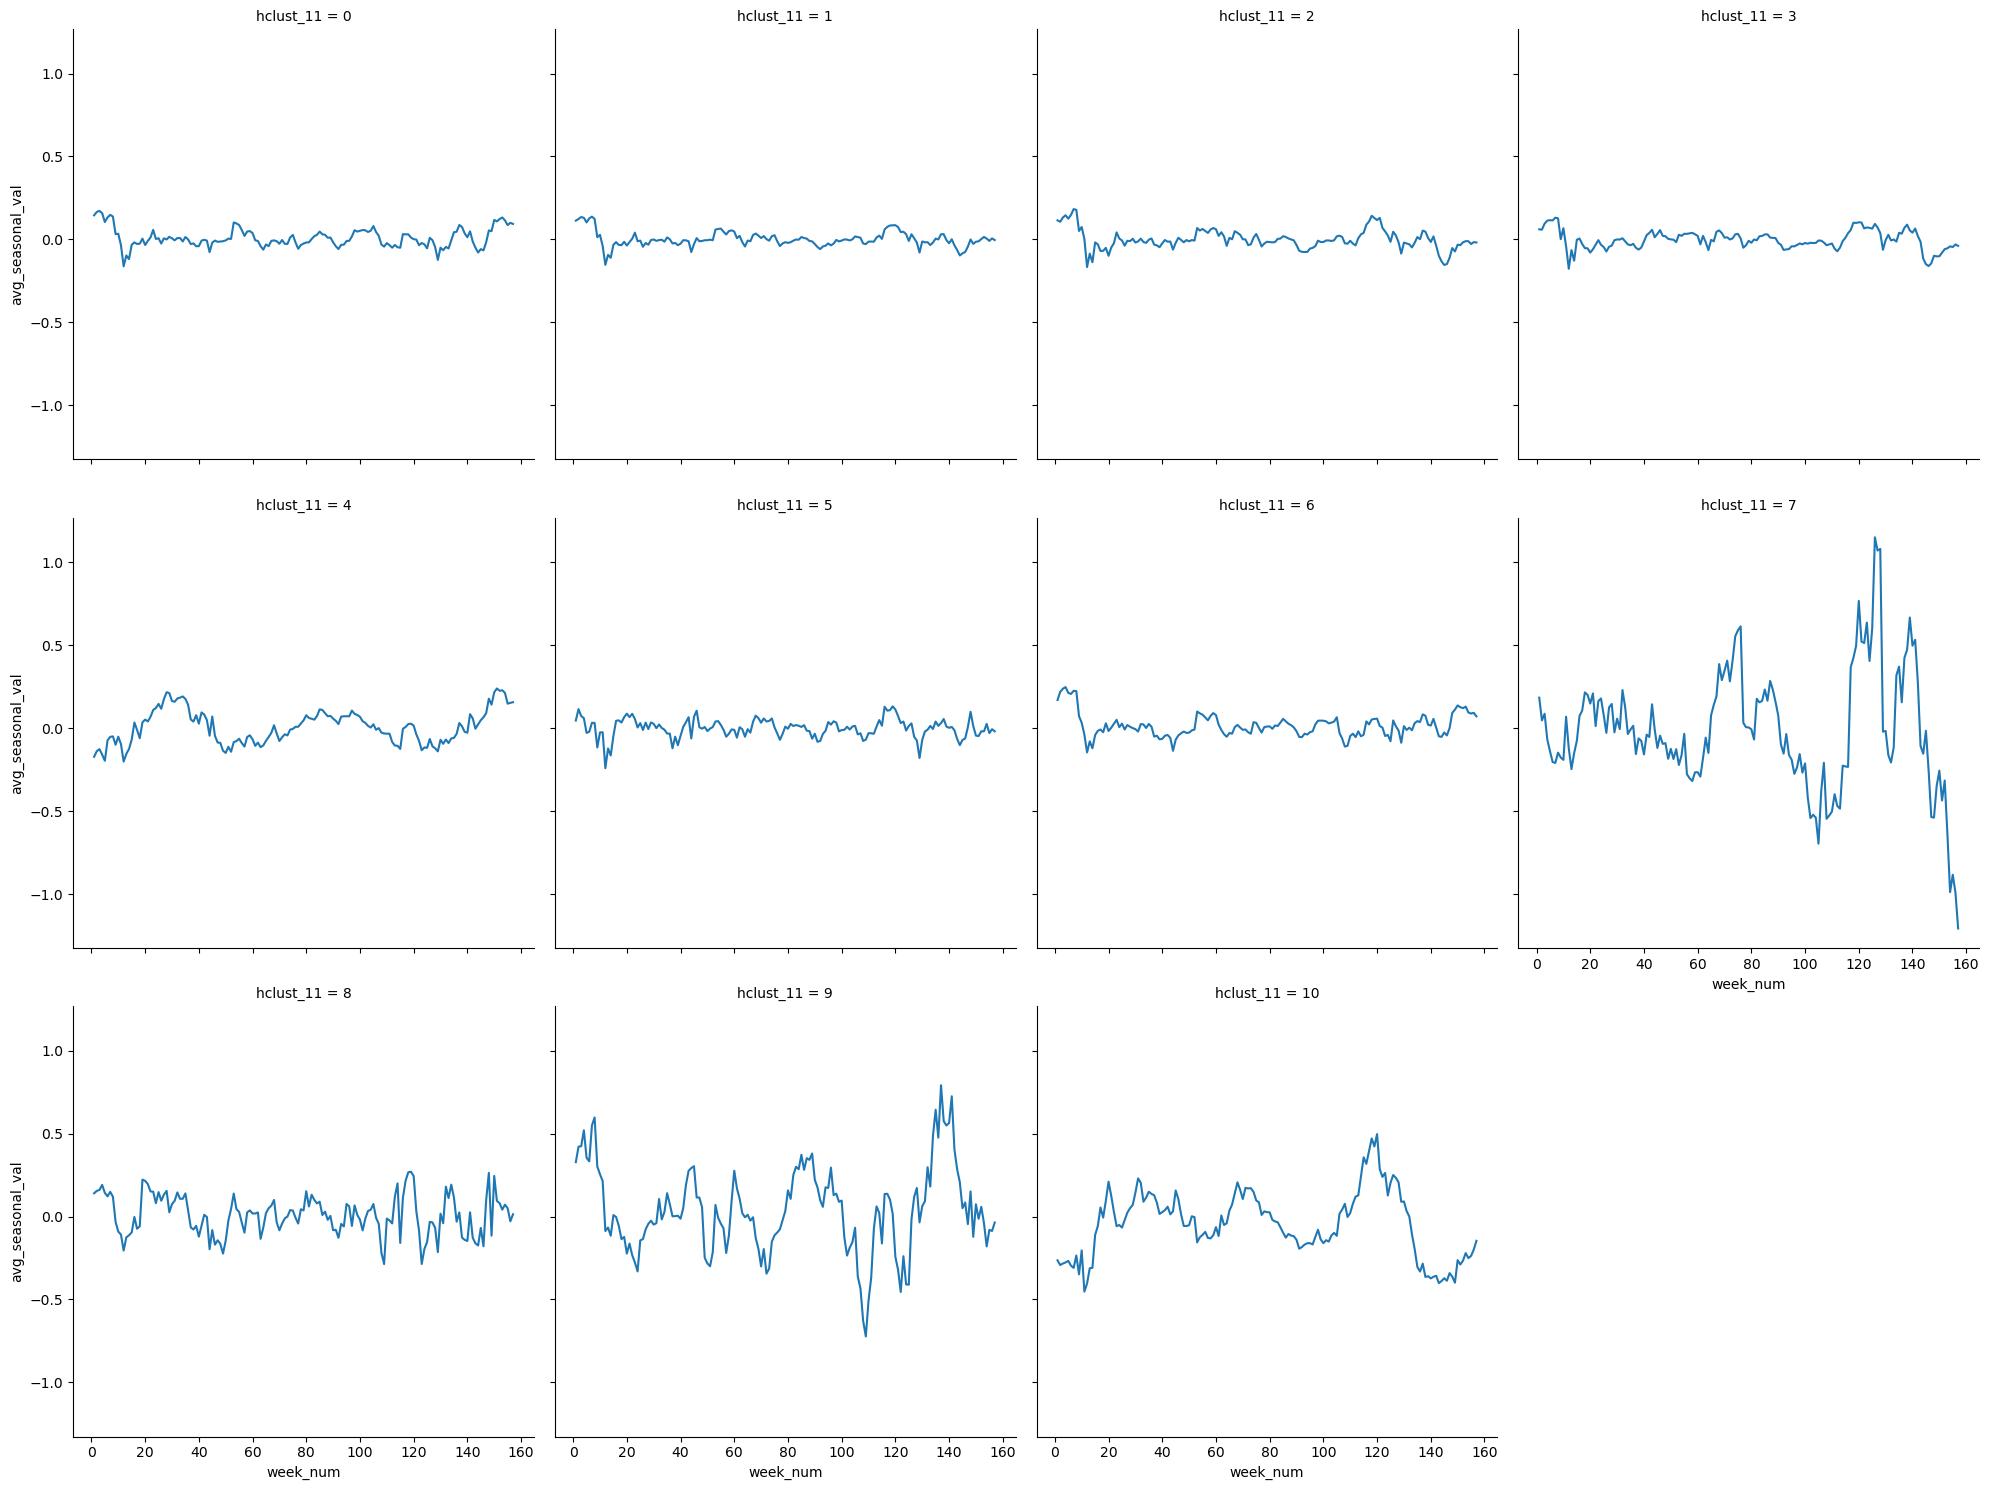

In [61]:
sns.relplot(data=hclust_avg_df, x='week_num', y='avg_seasonal_val', col='hclust_11', col_wrap=4,
           kind='line')

plt.show()

# PCA on Trend Data

**Extracting the seaonl data from wf_trend_seasonal data frame**

In [62]:
trend_wf_pca = trend_wf.copy()

In [63]:
trend_wf_pca.columns.values[1:] = ['trend_week_' + str(d).zfill(3) for d in range(1, 157+1)]

In [64]:
trend_wf_pca.head()

,symbol,trend_week_001,trend_week_002,trend_week_003,trend_week_004,trend_week_005,trend_week_006,trend_week_007,trend_week_008,trend_week_009,...,trend_week_148,trend_week_149,trend_week_150,trend_week_151,trend_week_152,trend_week_153,trend_week_154,trend_week_155,trend_week_156,trend_week_157
0,A,-0.250546,-0.238848,-0.227132,-0.215399,-0.203649,-0.191880,-0.180094,-0.168290,-0.156468,...,0.427623,0.421630,0.415636,0.409641,0.403647,0.397654,0.391663,0.385674,0.379689,0.373707
1,AAL,-0.570885,-0.568403,-0.565895,-0.563363,-0.560806,-0.558223,-0.555616,-0.552984,-0.550329,...,-0.584738,-0.589755,-0.594768,-0.599776,-0.604779,-0.609777,-0.614770,-0.619756,-0.624736,-0.629710
2,AAP,-0.252437,-0.247277,-0.242098,-0.236897,-0.231676,-0.226433,-0.221170,-0.215884,-0.210578,...,0.110821,0.105222,0.099597,0.093946,0.088271,0.082572,0.076849,0.071102,0.065333,0.059542
3,AAPL,-0.013662,-0.001812,0.010038,0.021886,0.033732,0.045578,0.057423,0.069267,0.081111,...,1.095322,1.095637,1.095928,1.096195,1.096437,1.096656,1.096849,1.097019,1.097163,1.097284
4,ABBV,-0.078559,-0.074493,-0.070424,-0.066354,-0.062282,-0.058207,-0.054130,-0.050050,-0.045966,...,0.800774,0.808546,0.816319,0.824093,0.831868,0.839644,0.847422,0.855201,0.862980,0.870761


**Check correlaion between trend weeks**

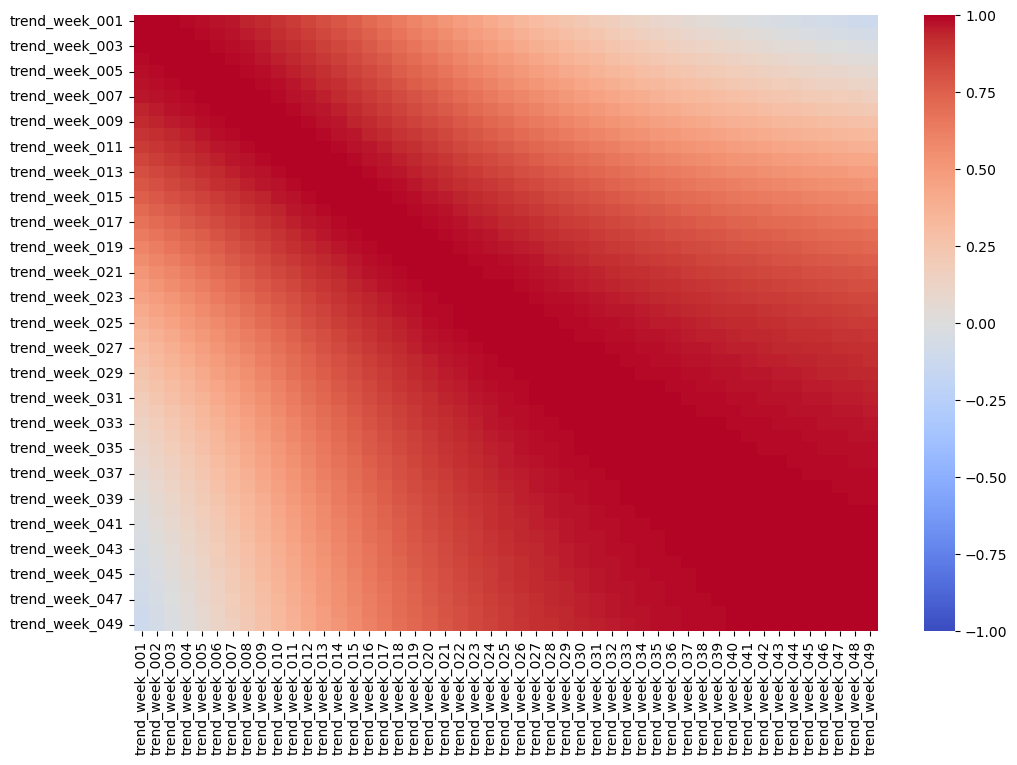

In [65]:
fig, ax = plt.subplots(figsize=(12,8))

sns.heatmap(data=trend_wf_pca.iloc[:,1:50].corr(),
           vmin=-1, vmax=1, center=0,
           cmap='coolwarm',
           ax=ax)

plt.show()

THe tredn data is very correlated.

**Exploring the correlation structure with PCA**

In [66]:
trend_wf_pca_ready = trend_wf_pca.select_dtypes('number').copy()

In [67]:
X_trend_ready = StandardScaler().fit_transform(trend_wf_pca_ready)

In [68]:
trend_pca_object = PCA().fit( X_trend_ready )

In [69]:
trend_pca_score = trend_pca_object.transform( X_trend_ready )

In [70]:
trend_pca_score.shape

(500, 157)

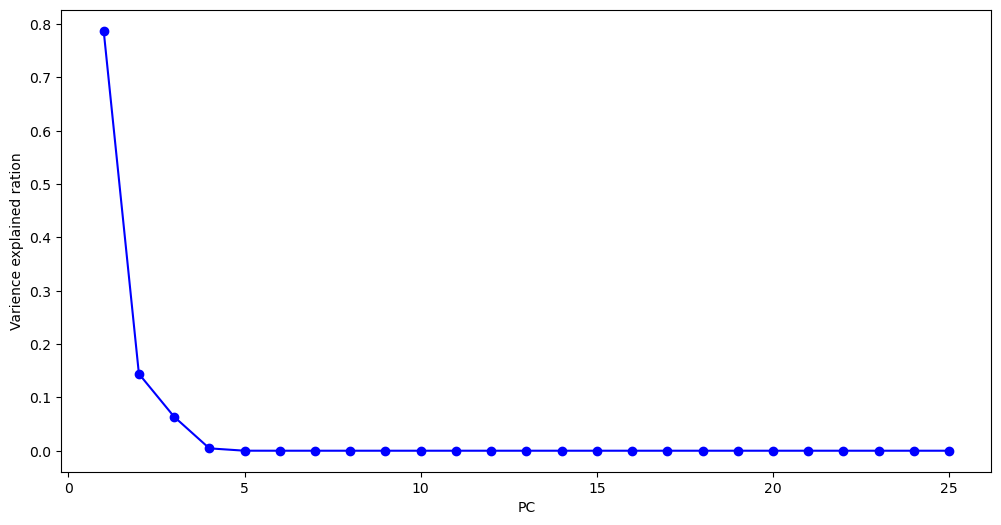

In [71]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(np.arange(len(trend_pca_object.explained_variance_ratio_[:25])) + 1,
        trend_pca_object.explained_variance_ratio_[:25], 'bo-')

ax.set_xlabel('PC')
ax.set_ylabel('Varience explained ration')

plt.show()

We just need PCa as after 5 PC the varience explained is almost zero.

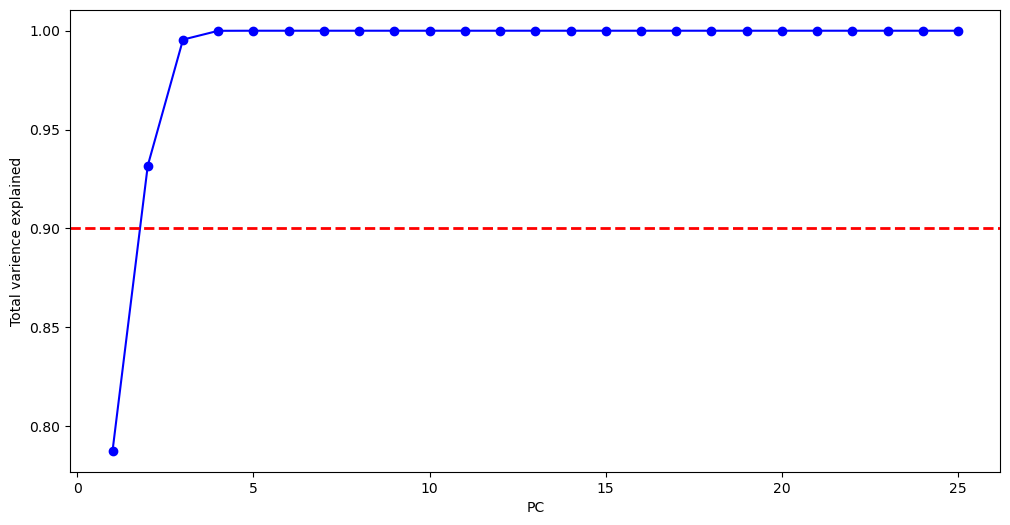

In [72]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(np.arange(len(trend_pca_object.explained_variance_ratio_.cumsum()[:25])) + 1,
        trend_pca_object.explained_variance_ratio_.cumsum()[:25],
        'bo-')

ax.axhline(y = 0.9, linestyle='--', linewidth=2, color='red')

ax.set_xlabel('PC')
ax.set_ylabel('Total varience explained')

plt.show()

More than `90%` od varience is explained by only 2 PCs.

In [73]:
trend_pc_names = ['pc_' + str(d).zfill(3) for d in range(1, trend_pca_score.shape[1]+1)]

In [74]:
trend_pca_df = pd.DataFrame(trend_pca_score, columns=trend_pc_names)

In [75]:
trend_pca_df.iloc[:, :10]

,pc_001,pc_002,pc_003,pc_004,pc_005,pc_006,pc_007,pc_008,pc_009,pc_010
0,4.542429,-0.220995,0.475833,0.205235,-0.064761,-0.000701,-0.001250,-0.000062,-0.000395,-0.000049
1,-14.169490,6.874010,2.730039,0.232343,0.080402,0.007372,-0.000195,0.000262,0.000239,0.000026
2,-1.983876,0.757127,0.326621,-0.463183,0.067124,-0.004195,-0.000141,0.000733,0.000129,0.000230
3,12.079661,-4.147056,-3.113008,-0.096081,-0.015583,-0.011707,-0.004074,0.001882,-0.000645,0.000206
4,2.719578,-1.652100,-4.084248,-0.169175,-0.061021,0.007747,-0.001003,0.000219,-0.000429,0.000013
...,...,...,...,...,...,...,...,...,...,...
495,-2.561911,-0.231292,-0.149891,-0.095107,-0.014721,0.002356,-0.000247,0.000371,-0.000407,0.000167
496,-6.014728,-0.903862,2.045454,0.859892,-0.015796,0.006112,-0.000280,-0.000371,0.000093,-0.000101
497,4.504878,2.388252,5.280022,0.169081,0.096575,-0.014162,-0.000933,0.002473,0.000342,0.000388
498,-6.132336,5.782314,0.351696,-0.241368,0.084842,0.004834,0.001953,-0.000751,-0.000350,-0.000030


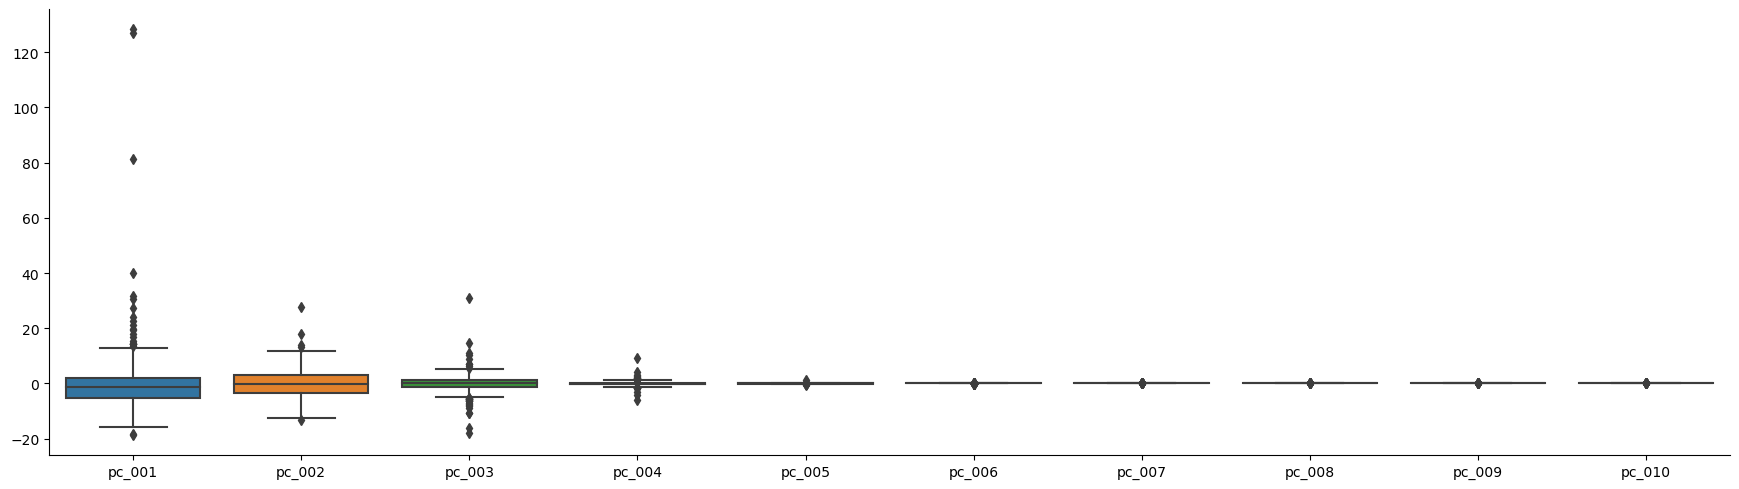

In [76]:
sns.catplot(data = trend_pca_df.iloc[:, :10], kind='box', aspect=3.5)

plt.show()

In [77]:
trend_pca_df['sector'] = wf.sector

In [78]:
trend_pca_df['symbol'] = wf.symbol

**Scatter plot for PC_001 v/s PC_002**

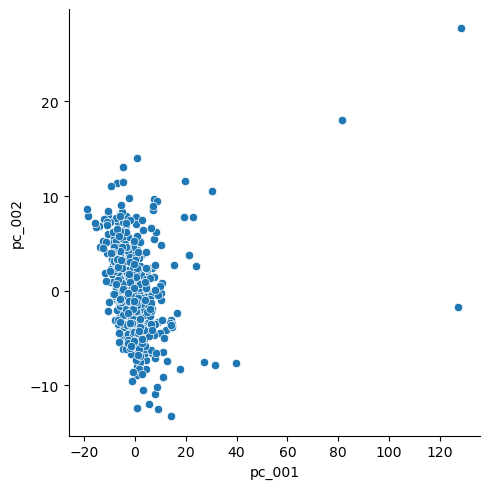

In [79]:
sns.relplot(data = trend_pca_df, x='pc_001', y='pc_002')

plt.show()

**Scatter plot for PC_001 v/s PC_002 grouped by sector**

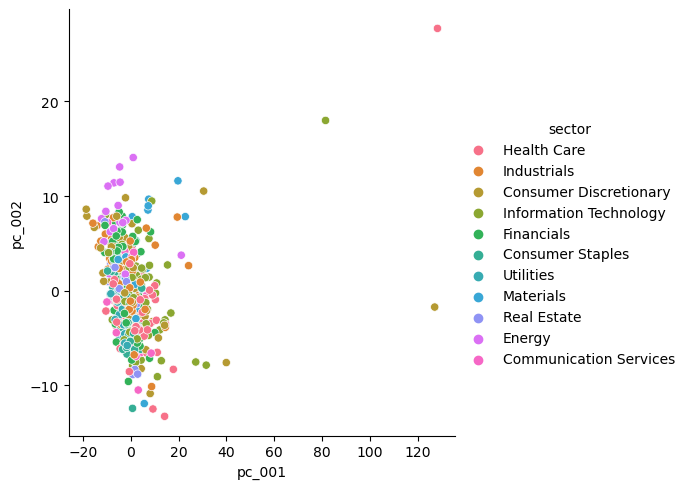

In [80]:
sns.relplot(data = trend_pca_df, x='pc_001', y='pc_002', hue='sector')

plt.show()

In [81]:
trend_hclust_ward = hierarchy.ward( trend_pca_score )

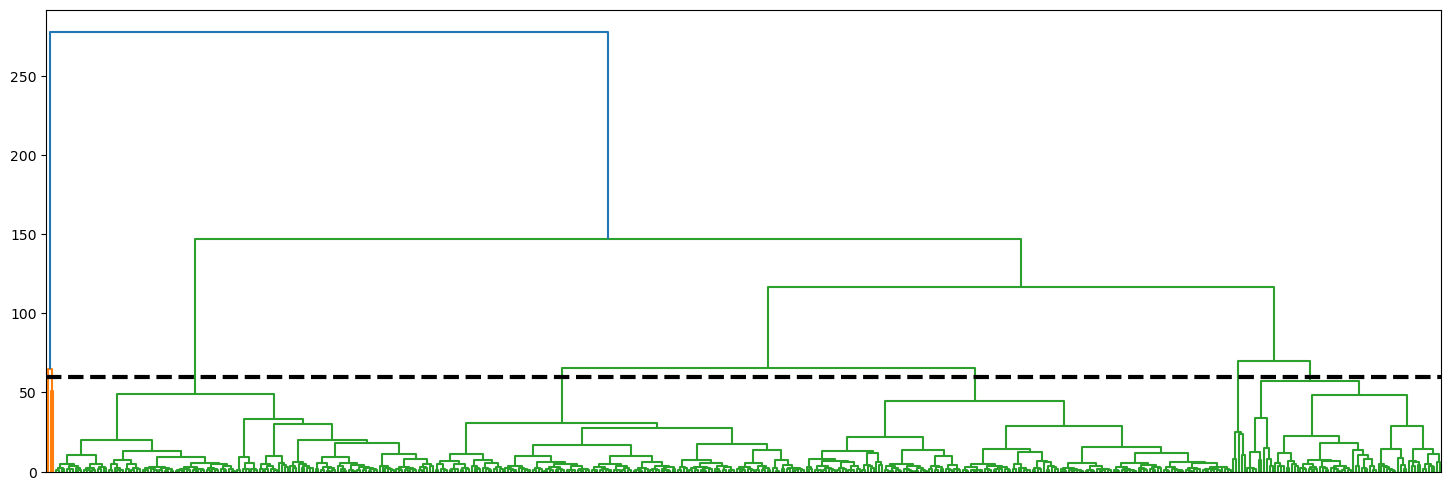

In [82]:
fig = plt.figure( figsize=(18,6) )

dn = hierarchy.dendrogram( trend_hclust_ward, no_labels=True )

plt.axhline(y=60, c='k', linestyle='--', linewidth=3)

plt.show()

**Cut the tree**

In [83]:
trend_ward_cut_7 = hierarchy.cut_tree( trend_hclust_ward, n_clusters=7 )

In [84]:
trend_ward_cut_7.ravel()

array([0, 1, 2, 0, 2, 3, 3, 1, 3, 3, 2, 2, 2, 3, 3, 3, 2, 1, 1, 2, 2, 3,
       0, 0, 1, 2, 1, 0, 3, 0, 2, 3, 2, 3, 0, 0, 3, 2, 3, 1, 3, 2, 2, 3,
       3, 3, 1, 2, 2, 3, 2, 2, 1, 1, 3, 1, 4, 3, 3, 2, 3, 2, 1, 3, 1, 1,
       1, 0, 3, 3, 2, 3, 1, 1, 1, 1, 3, 3, 2, 2, 1, 2, 3, 1, 3, 0, 2, 2,
       0, 1, 3, 3, 3, 2, 1, 3, 3, 1, 3, 2, 3, 3, 3, 3, 1, 1, 3, 1, 3, 3,
       3, 2, 0, 3, 2, 3, 3, 2, 0, 2, 3, 0, 2, 1, 1, 3, 1, 2, 0, 1, 3, 3,
       0, 3, 1, 1, 3, 2, 2, 2, 3, 2, 2, 3, 3, 0, 1, 0, 3, 3, 3, 3, 0, 1,
       2, 2, 2, 2, 5, 1, 0, 3, 1, 0, 3, 1, 2, 3, 4, 3, 3, 2, 3, 2, 2, 2,
       1, 3, 0, 3, 0, 1, 2, 3, 1, 1, 2, 1, 3, 1, 1, 2, 1, 0, 0, 2, 2, 1,
       1, 3, 3, 1, 2, 1, 4, 0, 0, 2, 1, 3, 2, 2, 1, 1, 1, 2, 3, 1, 1, 1,
       2, 3, 2, 1, 2, 3, 2, 1, 2, 3, 1, 2, 3, 0, 2, 3, 3, 3, 1, 0, 2, 2,
       2, 2, 2, 2, 3, 2, 3, 1, 3, 2, 2, 3, 3, 2, 1, 3, 2, 1, 2, 2, 1, 0,
       3, 1, 3, 3, 3, 1, 3, 0, 0, 3, 2, 2, 0, 3, 1, 3, 0, 0, 1, 1, 1, 1,
       2, 3, 2, 1, 3, 3, 2, 0, 3, 3, 1, 2, 3, 1, 1,

In [85]:
trend_pca_df['hclust_7'] = pd.Series(trend_ward_cut_7.ravel(), index=trend_pca_df.index)

trend_pca_df['hclust_7'] = trend_pca_df.hclust_7.astype('category')

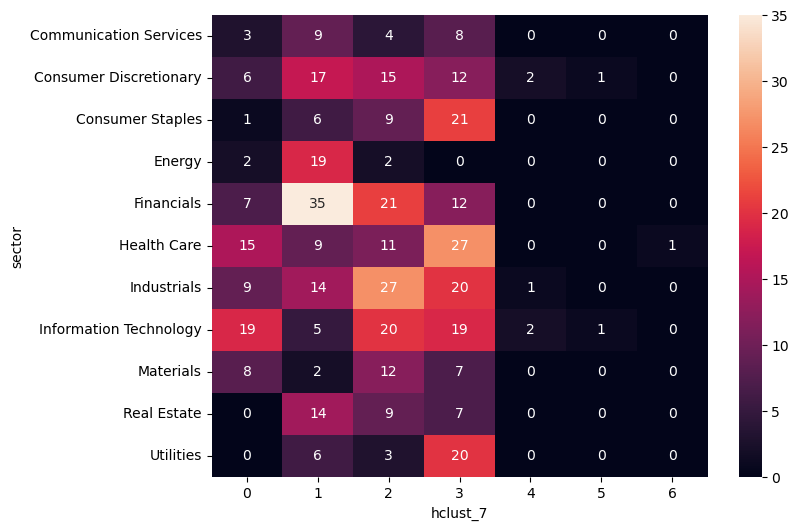

In [86]:
fig, ax = plt.subplots(figsize=(8,6))

sns.heatmap(pd.crosstab(trend_pca_df.sector, trend_pca_df.hclust_7, margins=False),
            annot=True, annot_kws={'size': 10})

plt.show()

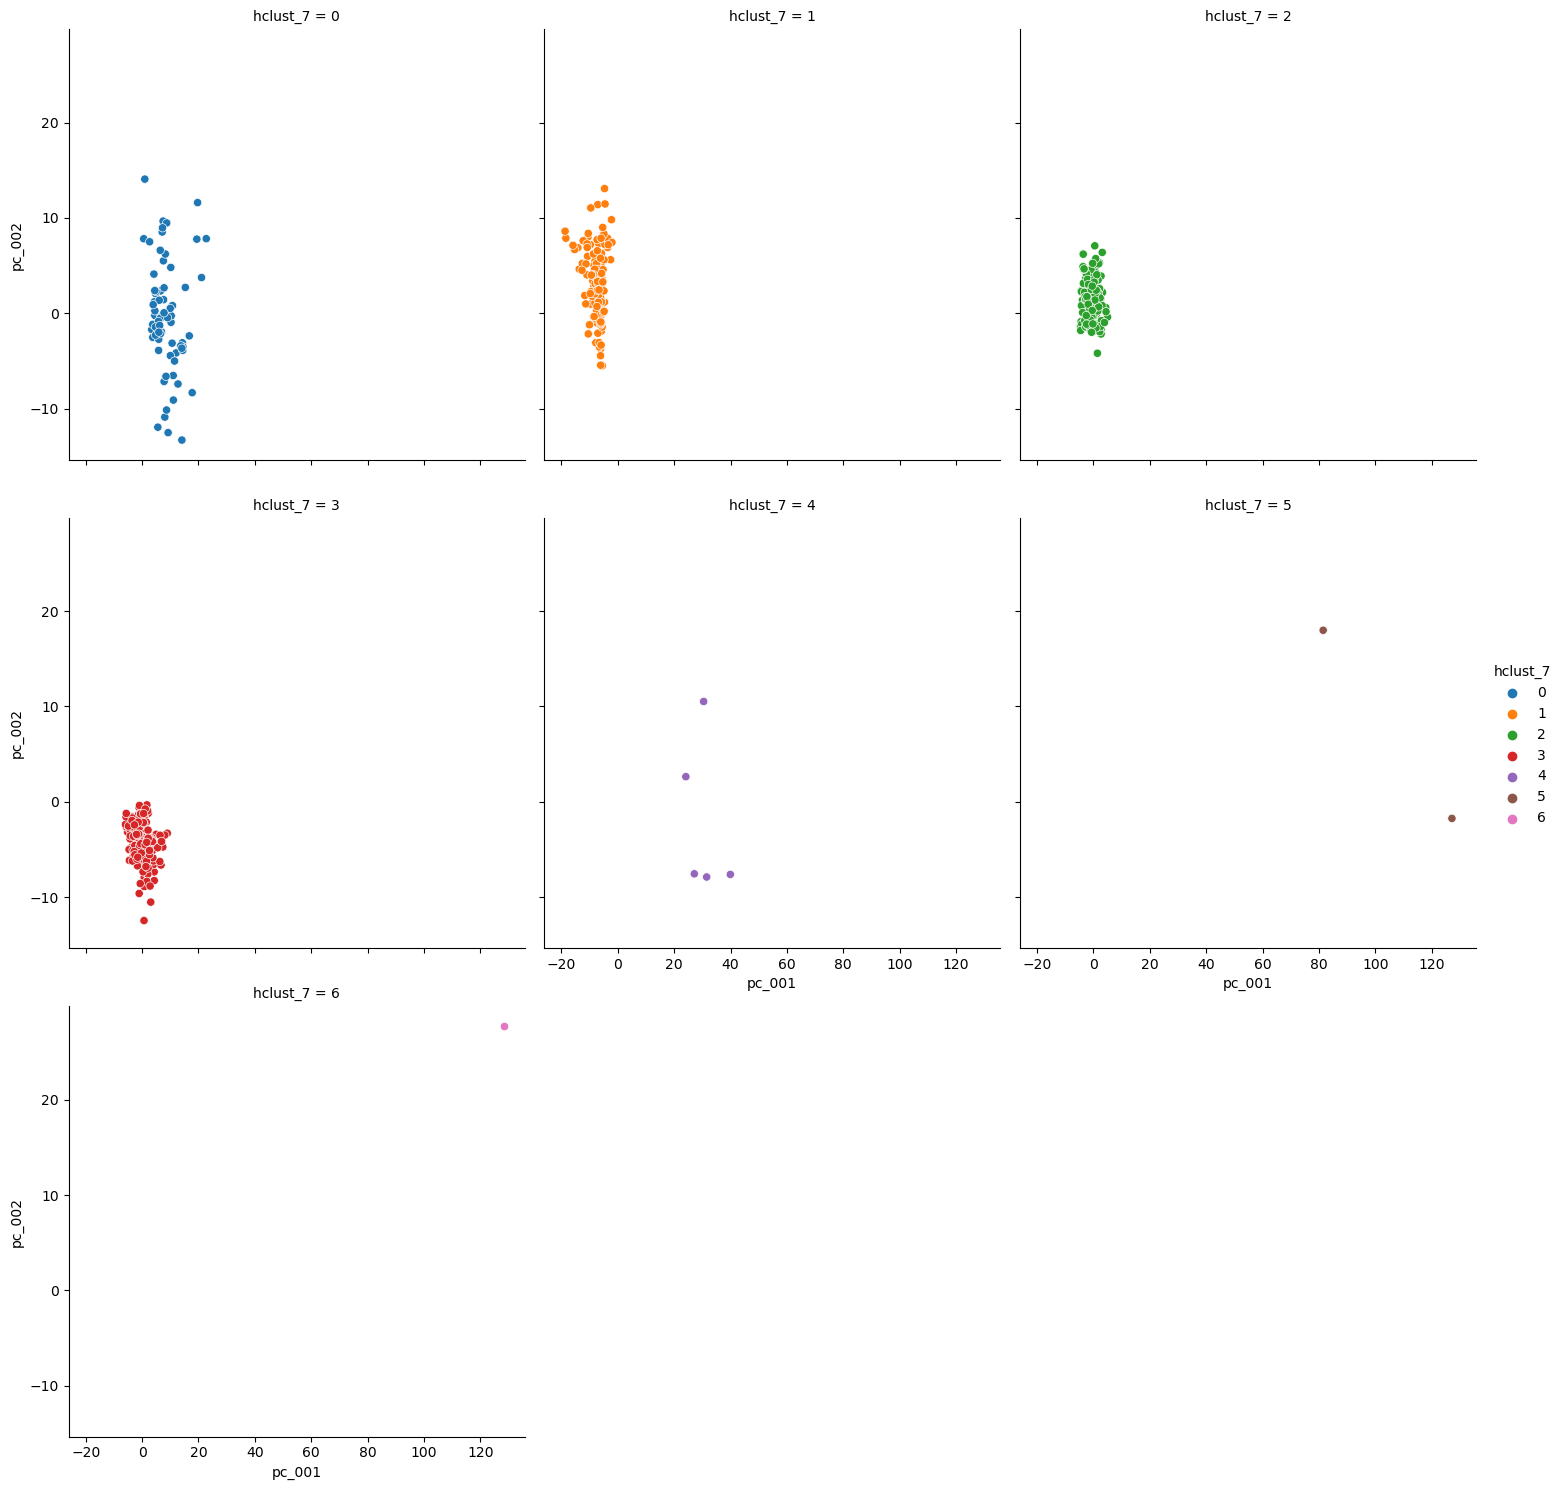

In [87]:
sns.relplot(data = trend_pca_df, x='pc_001', y='pc_002', hue='hclust_7', col='hclust_7', col_wrap=3)

plt.show()

As the case with seasonal data few companies seems to domiate, and hence there are just few points with cluster 4, 5, and 6.

But here with trend data we will try to remove all the data points associated with cluster 4, 5, and 6 then perform clustering again.

**Contribution Plot For PCA on Trend Data**

In [88]:
def calc_pca_contrib(load_mat):
    # square each element in the loadings matrix
    load_mat_sq = load_mat ** 2
    # sum the square loadings for each PC
    sum_load_squares = load_mat_sq.sum(axis=0)
    # divide the square loadings by the sum of the squared loadings per PC
    contrib_mat = load_mat_sq / sum_load_squares
    
    return(contrib_mat)

In [89]:
trend_pca_df.head()

,pc_001,pc_002,pc_003,pc_004,pc_005,pc_006,pc_007,pc_008,pc_009,pc_010,...,pc_151,pc_152,pc_153,pc_154,pc_155,pc_156,pc_157,sector,symbol,hclust_7
0,4.542429,-0.220995,0.475833,0.205235,-0.064761,-0.000701,-0.001250,-0.000062,-0.000395,-0.000049,...,6.678685e-17,-2.671474e-16,-1.734723e-16,-8.673617e-17,1.372329e-16,-1.207368e-15,-7.719519e-16,Health Care,A,0
1,-14.169490,6.874010,2.730039,0.232343,0.080402,0.007372,-0.000195,0.000262,0.000239,0.000026,...,-3.920475e-16,-1.804112e-16,2.220446e-16,-1.387779e-16,1.407403e-15,8.992806e-15,1.144917e-15,Industrials,AAL,1
2,-1.983876,0.757127,0.326621,-0.463183,0.067124,-0.004195,-0.000141,0.000733,0.000129,0.000230,...,1.058181e-16,5.030698e-16,0.000000e+00,2.463307e-16,4.745553e-16,1.181347e-15,1.582935e-16,Consumer Discretionary,AAP,2
3,12.079661,-4.147056,-3.113008,-0.096081,-0.015583,-0.011707,-0.004074,0.001882,-0.000645,0.000206,...,-2.706169e-16,-2.081668e-16,-8.326673e-17,-2.775558e-17,-7.953707e-16,-7.285839e-15,-1.047773e-15,Information Technology,AAPL,0
4,2.719578,-1.652100,-4.084248,-0.169175,-0.061021,0.007747,-0.001003,0.000219,-0.000429,0.000013,...,3.226586e-16,3.747003e-16,-2.775558e-17,-4.440892e-16,-4.539554e-16,-2.241263e-15,3.122502e-16,Health Care,ABBV,2


In [90]:
num_week = ['pc_' + str(d).zfill(3) for d in range(1, 157+1)]

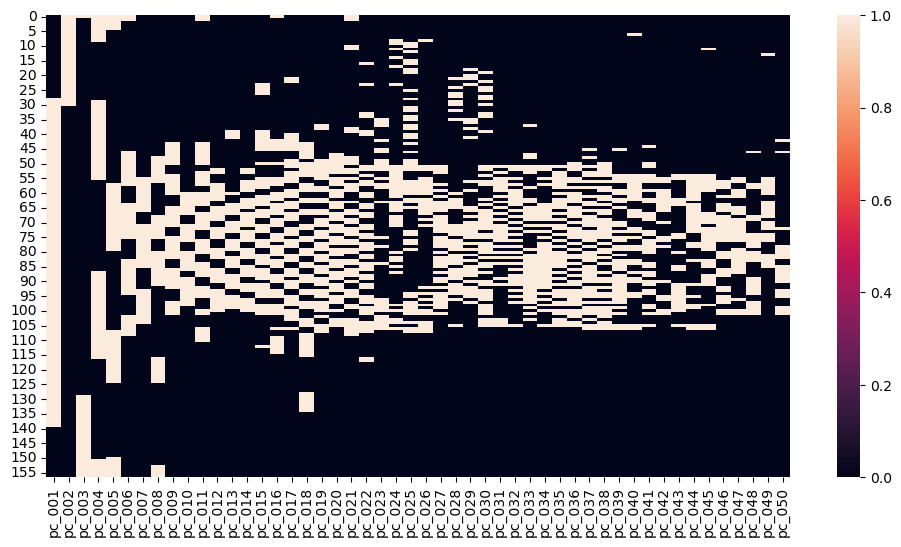

In [91]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.heatmap( data = ( np.transpose( calc_pca_contrib( trend_pca_object.components_) ) > (1 / trend_pca_score.shape[1]) )[:,:50], 
            xticklabels=trend_pca_df.iloc[:, :50].columns.tolist(),
            vmin=0, vmax=1)

plt.show()

The first PC explains the middle half of the data that is starting from the middle of first year to middle of 3rd year.

The second PC is associated with 1st year data and the 3rd PC covers 3rd year data.

**Trying to remove the 8 data points which takes cluster==4,5,6 and again perform clustering on rest of the data points.**

In [92]:
rest_df = trend_pca_df.loc[ ~( (trend_pca_df.hclust_7 == 4) | (trend_pca_df.hclust_7 == 5) | (trend_pca_df.hclust_7 == 6) )].copy()

In [93]:
rest_df = rest_df.drop(['hclust_7'], axis=1)

In [94]:
rest_ready = rest_df.select_dtypes('number').copy()

In [95]:
X_ready = StandardScaler().fit_transform( rest_ready )

In [96]:
rest_hclust_ward = hierarchy.ward( X_ready )

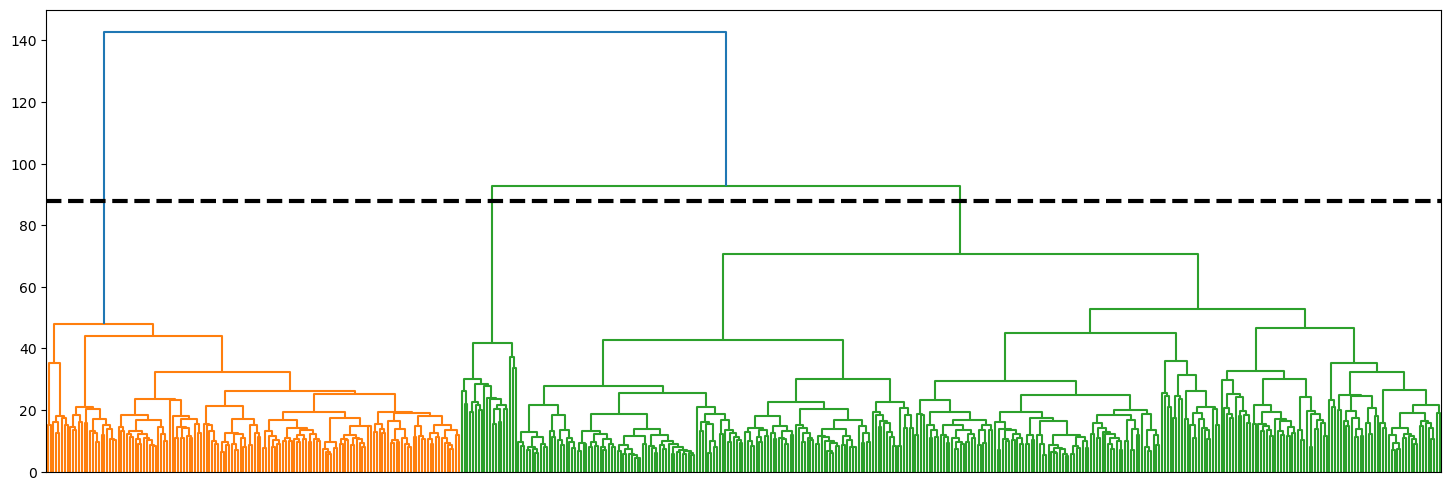

In [97]:
fig = plt.figure( figsize=(18,6) )

dn = hierarchy.dendrogram( rest_hclust_ward, no_labels=True )

plt.axhline(y=88, c='k', linestyle='--', linewidth=3)

plt.show()

In [98]:
rest_ward_cut_3 = hierarchy.cut_tree( rest_hclust_ward, n_clusters=3)

In [99]:
rest_df['hclust_3'] = pd.Series(rest_ward_cut_3.ravel(), index=rest_df.index)

rest_df['hclust_3'] = rest_df.hclust_3.astype('category')

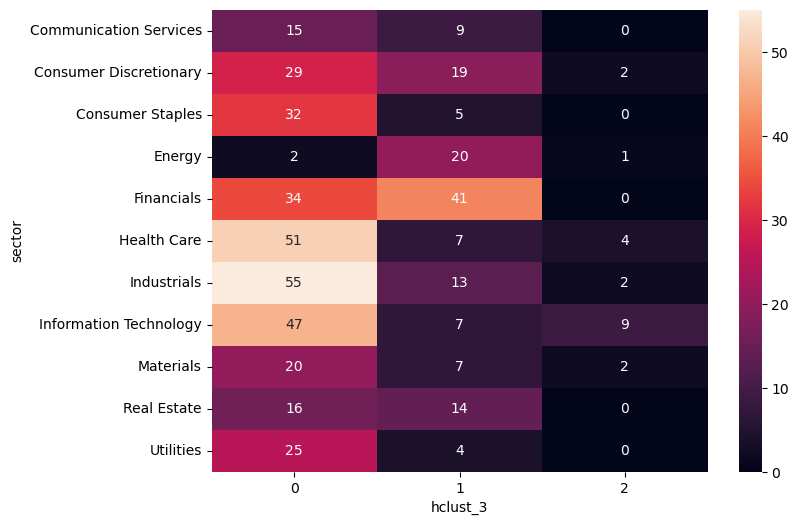

In [100]:
fig, ax = plt.subplots(figsize=(8,6))

sns.heatmap(pd.crosstab( rest_df.sector, rest_df.hclust_3, margins=False),
            annot=True, annot_kws={'size': 10})

plt.show()

In [101]:
rest_ward_cut_11 = hierarchy.cut_tree( rest_hclust_ward, n_clusters=11)

In [102]:
rest_df['hclust_11'] = pd.Series(rest_ward_cut_11.ravel(), index=rest_df.index)

rest_df['hclust_11'] = rest_df.hclust_11.astype('category')

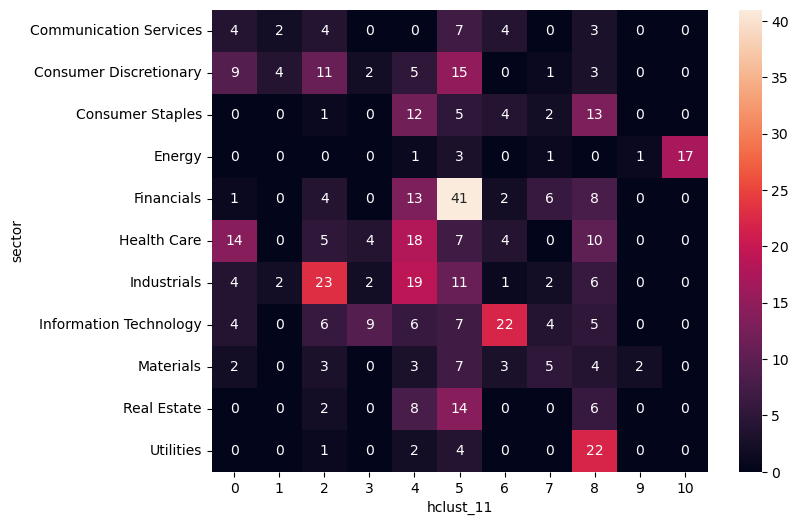

In [103]:
fig, ax = plt.subplots(figsize=(8,6))

sns.heatmap(pd.crosstab( rest_df.sector, rest_df.hclust_11, margins=False),
            annot=True, annot_kws={'size': 10})

plt.show()

**Converting the wide format trend data to long format.**

In [104]:
trend_lf = trend_wf.melt(id_vars='symbol')

In [105]:
trend_lf[['trend_word', 'week_word', 'week_num']] = trend_lf.variable.str.split(pat='_', expand=True)

In [106]:
trend_lf.week_num = trend_lf.week_num.astype('int64')

**Taking out the sector, symbol and hclust column from rest_df dataset**

In [107]:
rest_df_temp = rest_df.loc[:, ['sector', 'symbol', 'hclust_11']].copy()

**Choosing the same companies which we used for seasonal clustering**

In [108]:
temp_df = cluster0_df_join.loc[:, ['symbol']].copy()

In [109]:
rest_df_join = temp_df.merge(rest_df_temp, on='symbol')

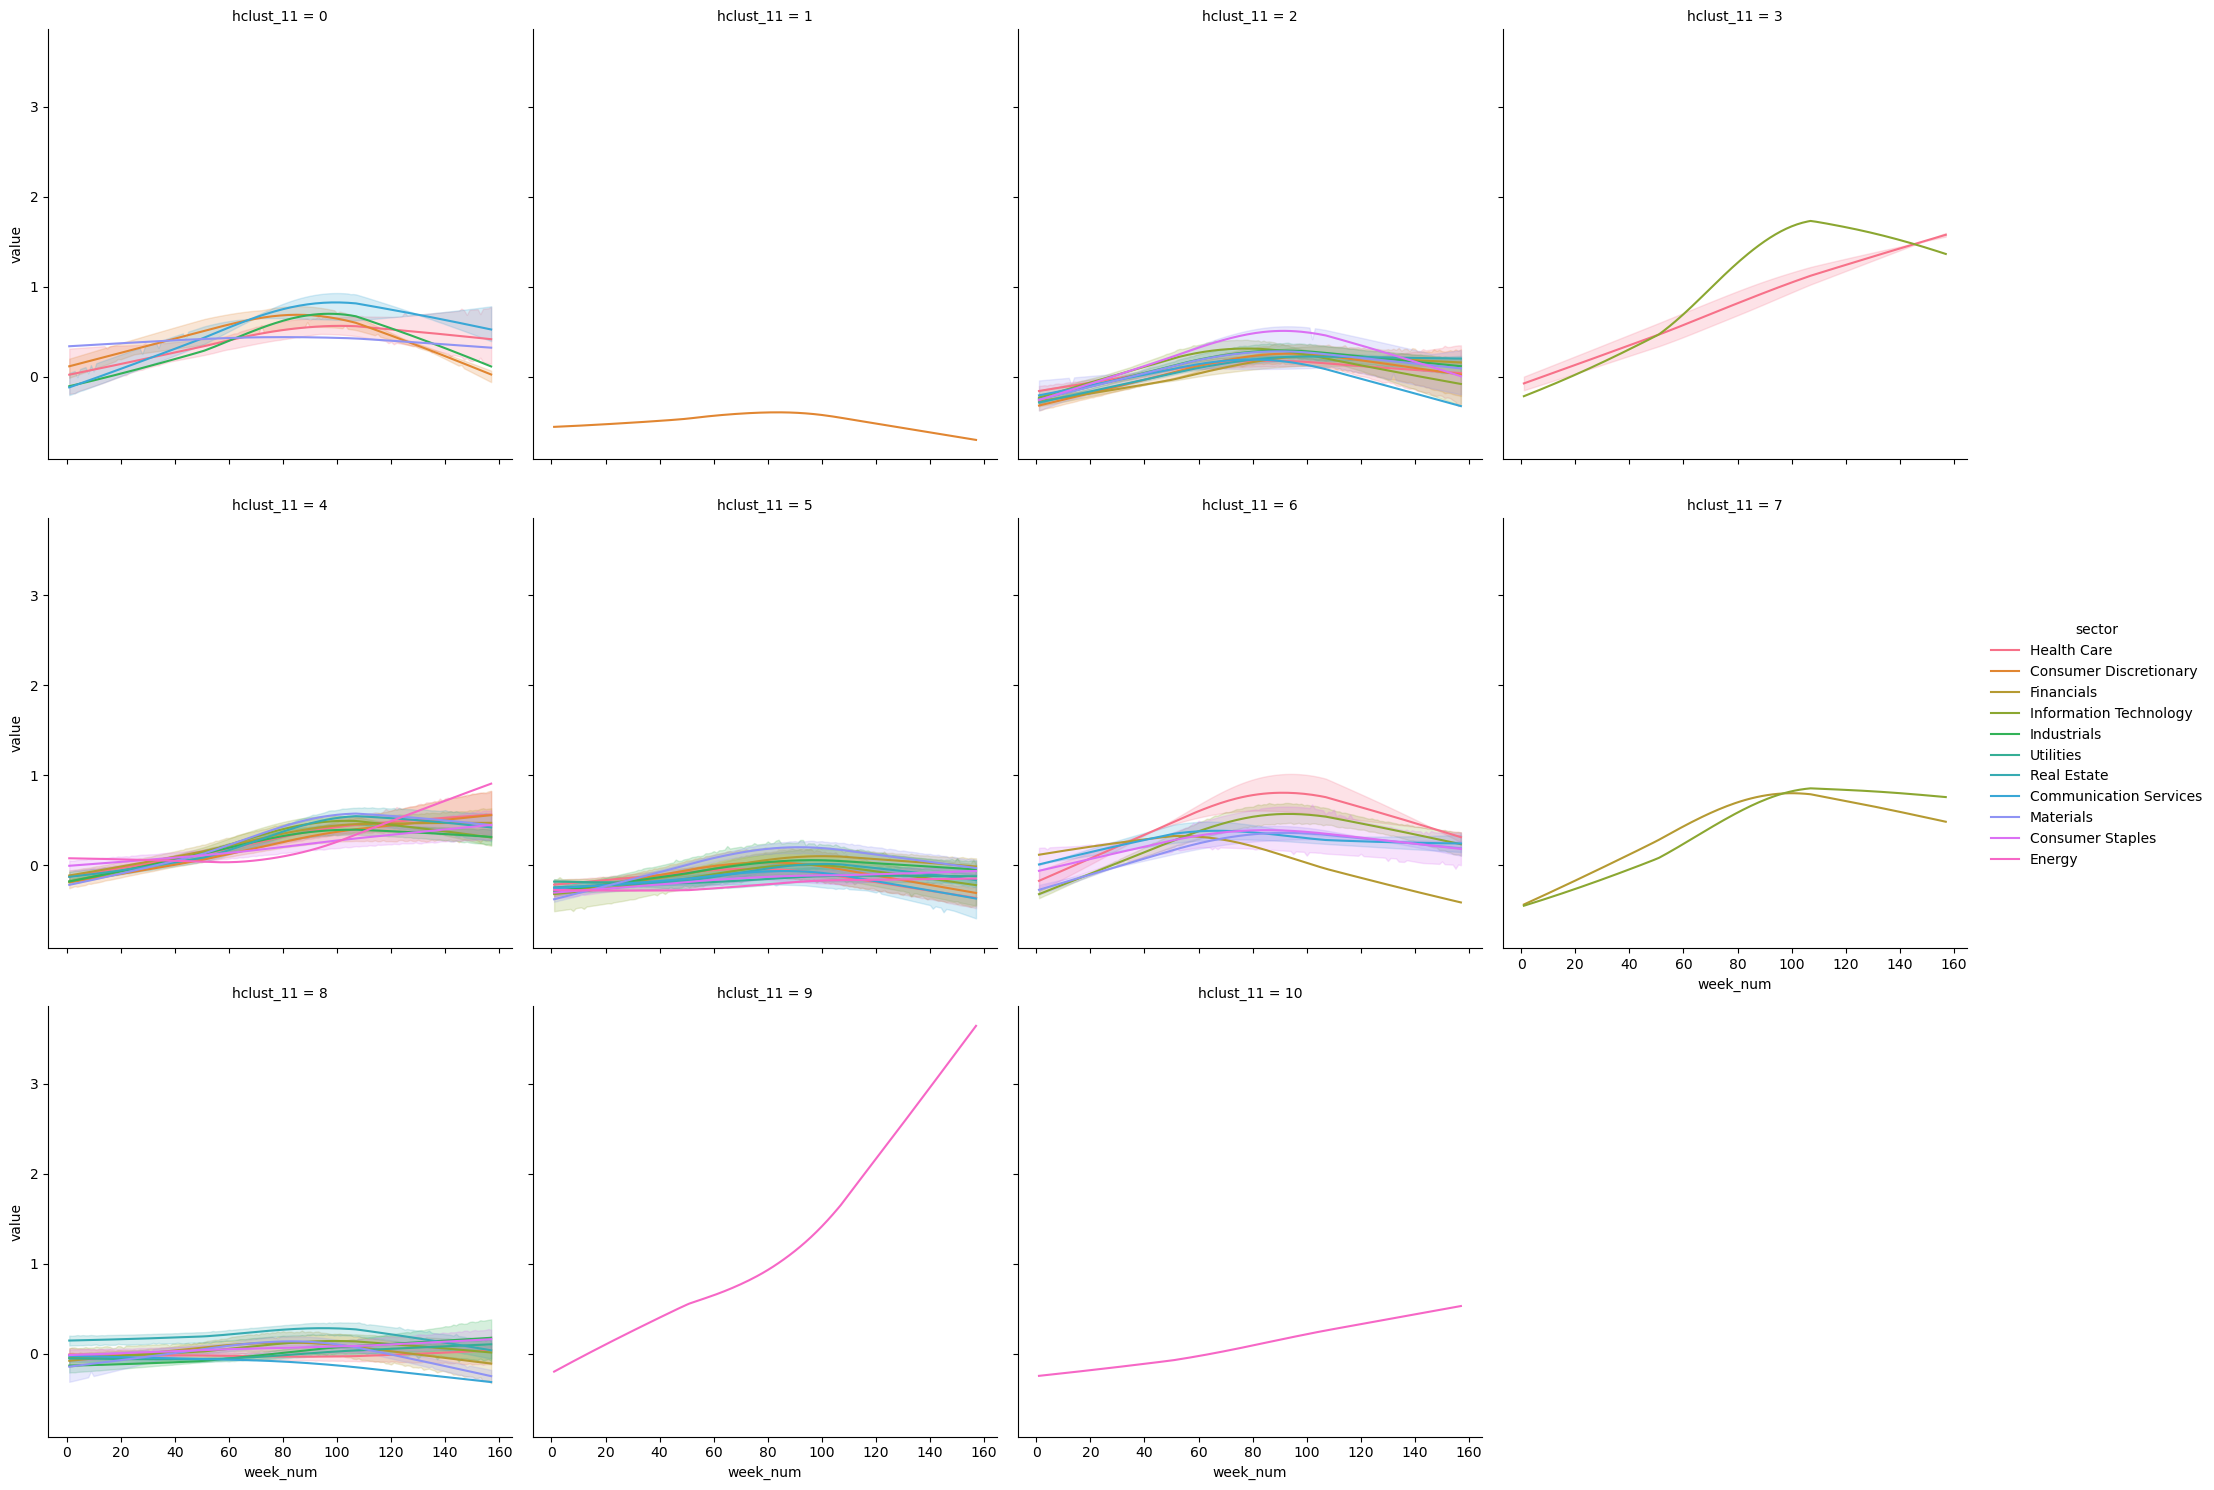

In [110]:
sns.relplot(data=trend_lf.merge(rest_df_join, on='symbol'), x='week_num', y='value',
            col='hclust_11', hue='sector', kind='line', col_wrap=4)

plt.show()

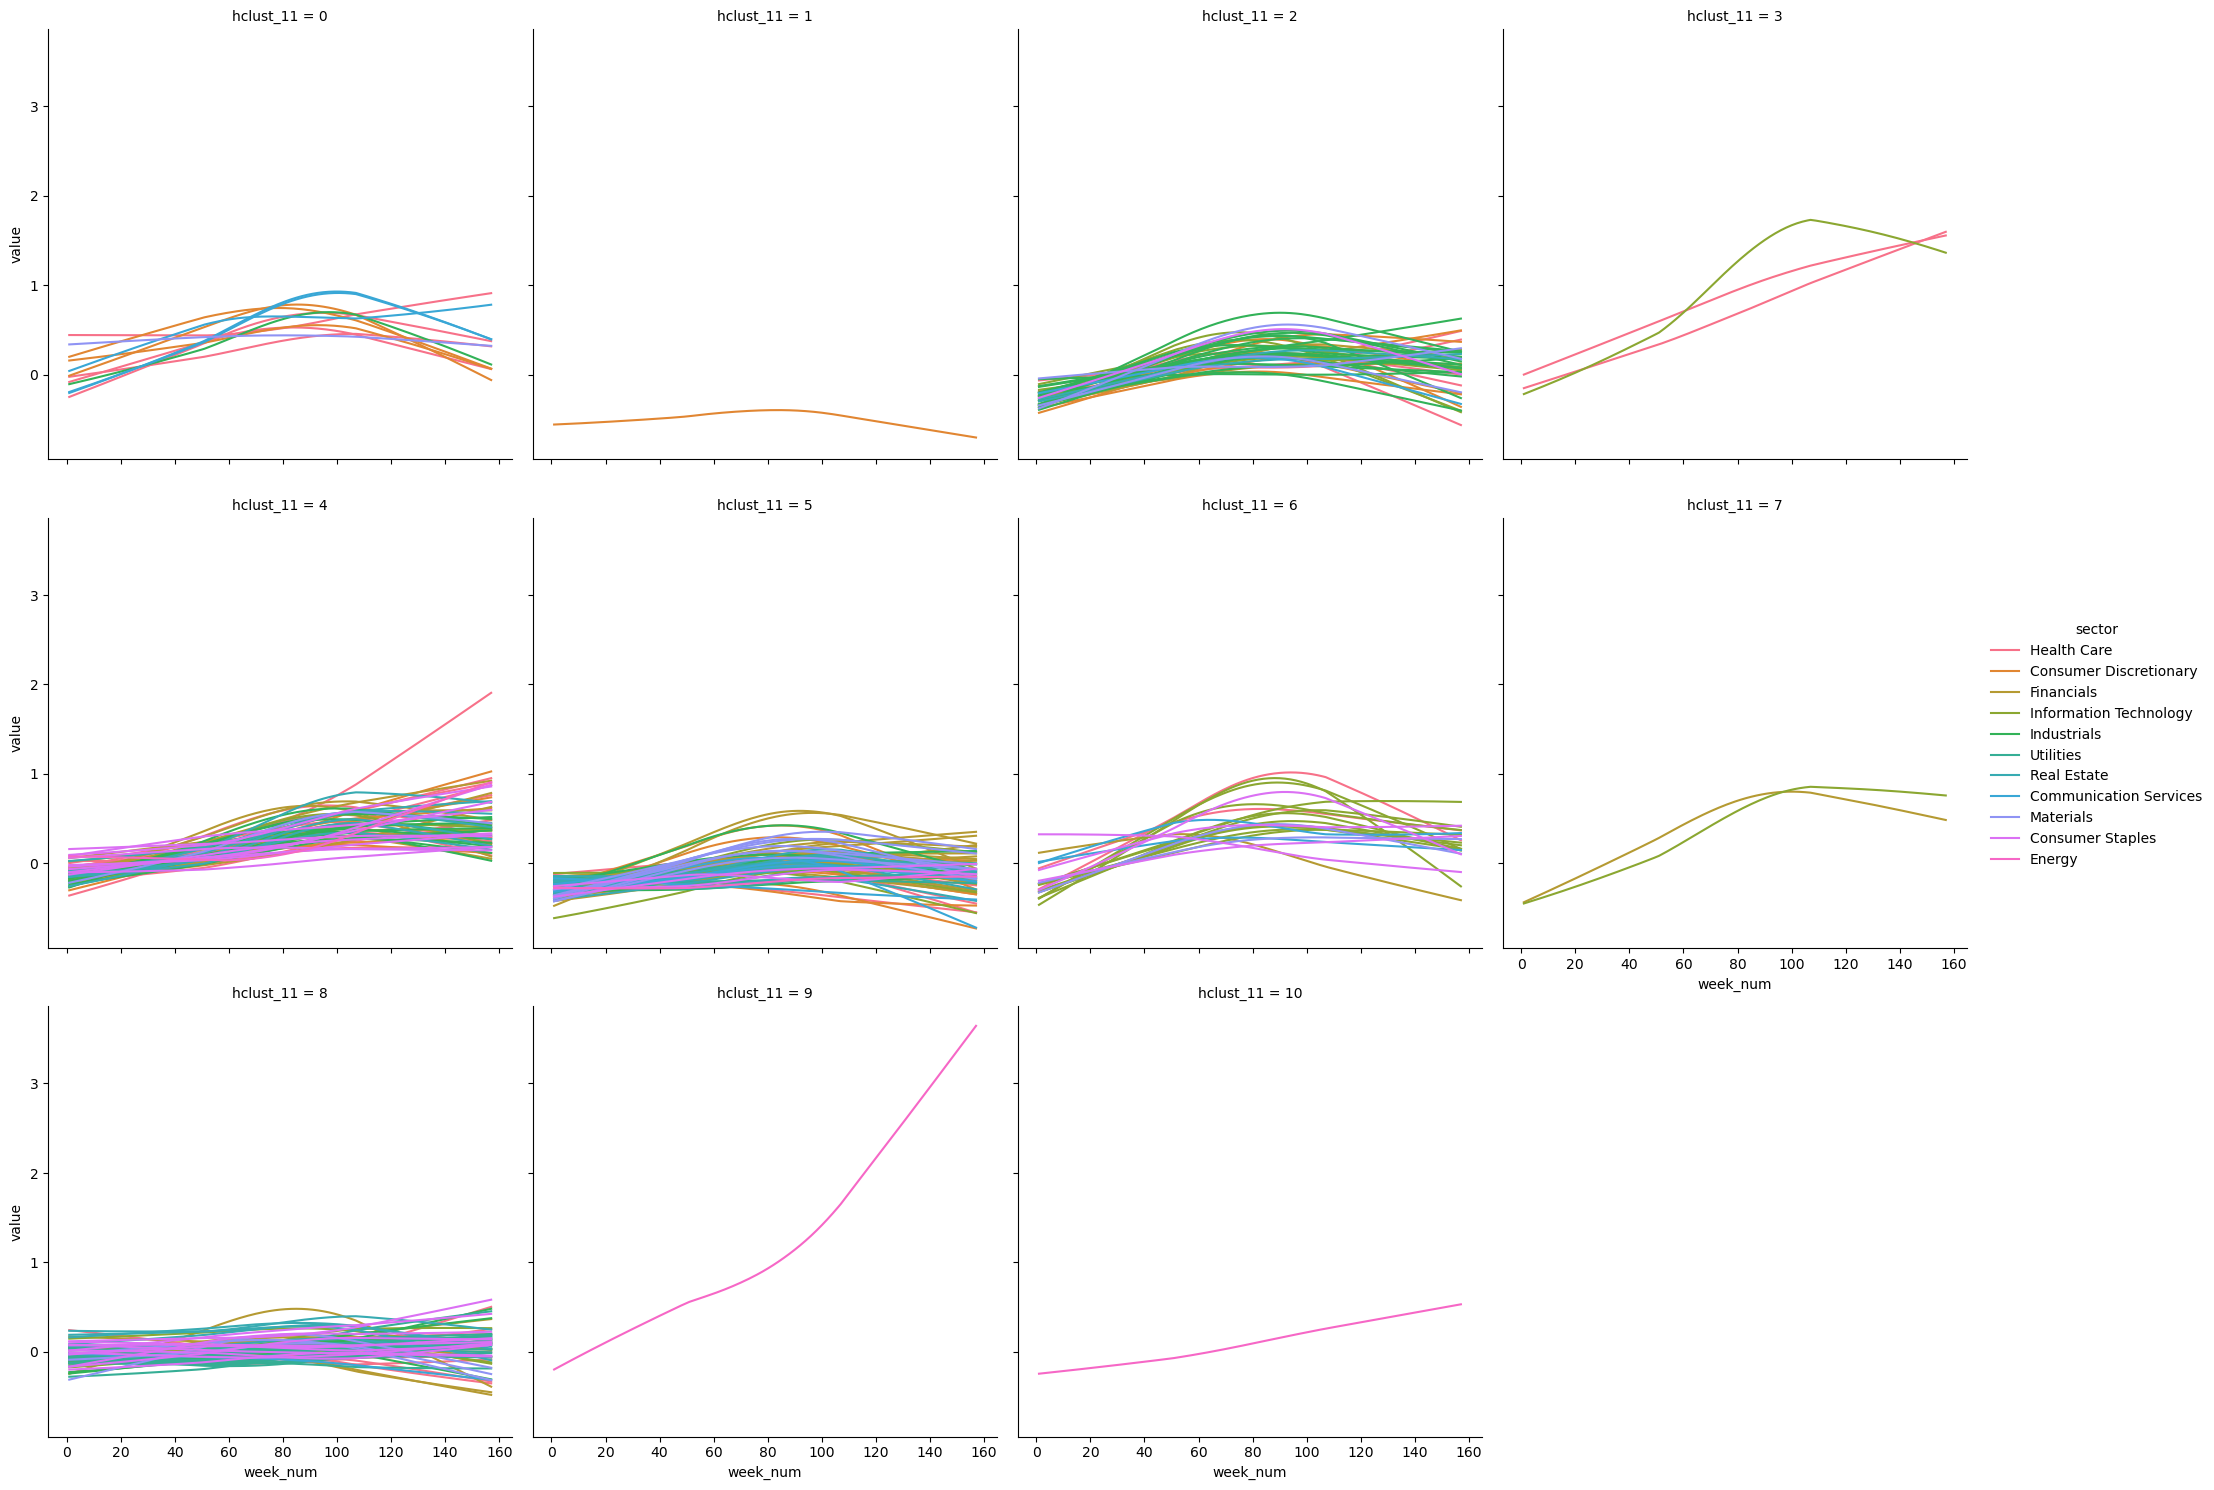

In [111]:
sns.relplot(data=trend_lf.merge(rest_df_join, on='symbol'), x='week_num', y='value',
            col='hclust_11', hue='sector', kind='line', col_wrap=4, units='symbol', estimator=None)

plt.show()

In [112]:
trend_hclust_avg_df = trend_lf.merge(rest_df_join, on='symbol').\
                      groupby(['hclust_11', 'week_num']).\
                      aggregate(avg_trend_val = ('value', 'mean')).reset_index()

In [113]:
trend_hclust_avg_df

,hclust_11,week_num,avg_trend_val
0,0,1,0.024515
1,0,2,0.031912
2,0,3,0.039319
3,0,4,0.046738
4,0,5,0.054167
...,...,...,...
1722,10,153,0.508094
1723,10,154,0.513477
1724,10,155,0.518858
1725,10,156,0.524239


In [114]:
pred_grid_trend = trend_hclust_avg_df.pivot(index='hclust_11', columns='week_num', values='avg_trend_val')

In [115]:
pred_grid_trend.reset_index(inplace=True)

In [116]:
pred_grid_trend.columns.values[1:]

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157], dtype=object)

In [117]:
pred_grid_trend.columns.values[1:] = [ 'trend_week_' + str(d).zfill(3) for d in range(1, 157+1)]

In [118]:
pred_grid_trend

week_num,hclust_11,trend_week_001,trend_week_002,trend_week_003,trend_week_004,trend_week_005,trend_week_006,trend_week_007,trend_week_008,trend_week_009,...,trend_week_148,trend_week_149,trend_week_150,trend_week_151,trend_week_152,trend_week_153,trend_week_154,trend_week_155,trend_week_156,trend_week_157
0,0,0.024515,0.031912,0.039319,0.046738,0.054167,0.061608,0.069061,0.076526,0.084004,...,0.372384,0.365631,0.358863,0.352078,0.345279,0.338465,0.331637,0.324796,0.317943,0.311077
1,1,-0.559142,-0.557824,-0.556481,-0.555113,-0.553720,-0.552301,-0.550858,-0.549389,-0.547897,...,-0.660176,-0.665102,-0.670022,-0.674937,-0.679844,-0.684745,-0.689638,-0.694523,-0.699401,-0.704270
2,2,-0.251022,-0.244015,-0.236996,-0.229966,-0.222924,-0.215870,-0.208805,-0.201730,-0.194644,...,0.092387,0.088940,0.085498,0.082060,0.078627,0.075199,0.071776,0.068359,0.064948,0.061542
3,3,-0.123636,-0.112481,-0.101305,-0.090107,-0.078885,-0.067640,-0.056371,-0.045076,-0.033754,...,1.480142,1.483049,1.485919,1.488752,1.491550,1.494312,1.497042,1.499739,1.502404,1.505040
4,4,-0.122098,-0.117651,-0.113190,-0.108716,-0.104227,-0.099724,-0.095207,-0.090675,-0.086128,...,0.455183,0.455677,0.456161,0.456635,0.457099,0.457553,0.457998,0.458434,0.458861,0.459279
5,5,-0.286073,-0.282831,-0.279574,-0.276300,-0.273009,-0.269702,-0.266379,-0.263039,-0.259683,...,-0.119253,-0.122454,-0.125657,-0.128861,-0.132066,-0.135270,-0.138475,-0.141679,-0.144882,-0.148084
6,6,-0.207679,-0.197619,-0.187555,-0.177487,-0.167417,-0.157343,-0.147267,-0.137189,-0.127108,...,0.245052,0.239746,0.234437,0.229125,0.223810,0.218494,0.213175,0.207855,0.202534,0.197211
7,7,-0.444654,-0.433118,-0.421544,-0.409929,-0.398273,-0.386574,-0.374834,-0.363051,-0.351226,...,0.660680,0.656154,0.651608,0.647043,0.642461,0.637863,0.633250,0.628625,0.623986,0.619337
8,8,-0.038143,-0.037476,-0.036802,-0.036121,-0.035432,-0.034735,-0.034031,-0.033319,-0.032600,...,0.053617,0.053276,0.052934,0.052591,0.052248,0.051904,0.051560,0.051216,0.050872,0.050528
9,9,-0.199552,-0.183203,-0.166904,-0.150656,-0.134461,-0.118321,-0.102236,-0.086208,-0.070236,...,3.281738,3.322003,3.362279,3.402565,3.442858,3.483157,3.523460,3.563766,3.604073,3.644380


In [119]:
pred_grid_ses

week_num,hclust_11,seasonal_week_001,seasonal_week_002,seasonal_week_003,seasonal_week_004,seasonal_week_005,seasonal_week_006,seasonal_week_007,seasonal_week_008,seasonal_week_009,...,seasonal_week_148,seasonal_week_149,seasonal_week_150,seasonal_week_151,seasonal_week_152,seasonal_week_153,seasonal_week_154,seasonal_week_155,seasonal_week_156,seasonal_week_157
0,0,0.145409,0.166053,0.172162,0.158146,0.104971,0.132933,0.148344,0.138148,0.032057,...,0.054416,0.049900,0.117633,0.108649,0.122801,0.132492,0.114943,0.086617,0.100134,0.093484
1,1,0.113496,0.123134,0.135175,0.130316,0.102843,0.126861,0.137408,0.123490,0.013777,...,-0.000062,-0.026799,-0.013952,-0.011176,0.002398,0.015092,0.005441,-0.008702,0.006209,-0.003866
2,2,0.115009,0.106604,0.132549,0.145650,0.125024,0.147705,0.182848,0.178218,0.050962,...,-0.051698,-0.072385,-0.031603,-0.034350,-0.017338,-0.010256,-0.010674,-0.027577,-0.016361,-0.018214
3,3,0.061015,0.058983,0.095359,0.113674,0.115806,0.114625,0.131234,0.126915,0.001522,...,-0.098402,-0.102093,-0.101506,-0.079469,-0.058461,-0.053312,-0.041790,-0.045704,-0.030058,-0.038798
4,4,-0.173275,-0.139467,-0.127519,-0.160604,-0.197421,-0.074450,-0.053298,-0.050630,-0.100797,...,0.176683,0.140836,0.214989,0.238218,0.224398,0.227309,0.211668,0.146663,0.151614,0.155438
5,5,0.044785,0.113885,0.072256,0.059157,-0.029451,-0.022872,0.031471,0.030357,-0.117338,...,0.098078,0.011959,-0.045909,-0.048568,-0.019783,-0.020108,0.024494,-0.030910,-0.007260,-0.020185
6,6,0.168546,0.218149,0.236682,0.246642,0.211752,0.205326,0.224149,0.222184,0.071299,...,0.091071,0.110949,0.136023,0.125607,0.119542,0.129125,0.093604,0.086867,0.091556,0.070217
7,7,0.183030,0.045783,0.086079,-0.069313,-0.139810,-0.205300,-0.210206,-0.148535,-0.177641,...,-0.539978,-0.349810,-0.257196,-0.436932,-0.316747,-0.639163,-0.989237,-0.884706,-0.992504,-1.208485
8,8,0.140198,0.154769,0.160586,0.190944,0.142500,0.121949,0.149067,0.119565,-0.032798,...,0.263677,-0.115153,0.244682,0.093992,0.080548,0.041659,0.071673,0.050236,-0.028774,0.013842
9,9,0.327999,0.421075,0.424207,0.520029,0.354719,0.332757,0.549123,0.597740,0.301726,...,0.151689,-0.122089,0.074040,-0.013663,0.058857,-0.040776,-0.180007,-0.080228,-0.086983,-0.035958


In [120]:
pred_grid = pred_grid_ses.set_index('hclust_11').join(pred_grid_trend.set_index('hclust_11'), on='hclust_11', how='left').reset_index()

In [121]:
pred_grid['sector'] = 'Financials'

In [122]:
pred_grid

week_num,hclust_11,seasonal_week_001,seasonal_week_002,seasonal_week_003,seasonal_week_004,seasonal_week_005,seasonal_week_006,seasonal_week_007,seasonal_week_008,seasonal_week_009,...,trend_week_149,trend_week_150,trend_week_151,trend_week_152,trend_week_153,trend_week_154,trend_week_155,trend_week_156,trend_week_157,sector
0,0,0.145409,0.166053,0.172162,0.158146,0.104971,0.132933,0.148344,0.138148,0.032057,...,0.365631,0.358863,0.352078,0.345279,0.338465,0.331637,0.324796,0.317943,0.311077,Financials
1,1,0.113496,0.123134,0.135175,0.130316,0.102843,0.126861,0.137408,0.123490,0.013777,...,-0.665102,-0.670022,-0.674937,-0.679844,-0.684745,-0.689638,-0.694523,-0.699401,-0.704270,Financials
2,2,0.115009,0.106604,0.132549,0.145650,0.125024,0.147705,0.182848,0.178218,0.050962,...,0.088940,0.085498,0.082060,0.078627,0.075199,0.071776,0.068359,0.064948,0.061542,Financials
3,3,0.061015,0.058983,0.095359,0.113674,0.115806,0.114625,0.131234,0.126915,0.001522,...,1.483049,1.485919,1.488752,1.491550,1.494312,1.497042,1.499739,1.502404,1.505040,Financials
4,4,-0.173275,-0.139467,-0.127519,-0.160604,-0.197421,-0.074450,-0.053298,-0.050630,-0.100797,...,0.455677,0.456161,0.456635,0.457099,0.457553,0.457998,0.458434,0.458861,0.459279,Financials
5,5,0.044785,0.113885,0.072256,0.059157,-0.029451,-0.022872,0.031471,0.030357,-0.117338,...,-0.122454,-0.125657,-0.128861,-0.132066,-0.135270,-0.138475,-0.141679,-0.144882,-0.148084,Financials
6,6,0.168546,0.218149,0.236682,0.246642,0.211752,0.205326,0.224149,0.222184,0.071299,...,0.239746,0.234437,0.229125,0.223810,0.218494,0.213175,0.207855,0.202534,0.197211,Financials
7,7,0.183030,0.045783,0.086079,-0.069313,-0.139810,-0.205300,-0.210206,-0.148535,-0.177641,...,0.656154,0.651608,0.647043,0.642461,0.637863,0.633250,0.628625,0.623986,0.619337,Financials
8,8,0.140198,0.154769,0.160586,0.190944,0.142500,0.121949,0.149067,0.119565,-0.032798,...,0.053276,0.052934,0.052591,0.052248,0.051904,0.051560,0.051216,0.050872,0.050528,Financials
9,9,0.327999,0.421075,0.424207,0.520029,0.354719,0.332757,0.549123,0.597740,0.301726,...,3.322003,3.362279,3.402565,3.442858,3.483157,3.523460,3.563766,3.604073,3.644380,Financials


In [123]:
# pred_grid.to_csv('pred_grid.csv')

***Taking the first 8 PCs standardise them and then perform clustering on it again.***

In [124]:
first8_df = trend_pca_df.iloc[:, :8].copy()

In [125]:
first8_ready = StandardScaler().fit_transform( first8_df )

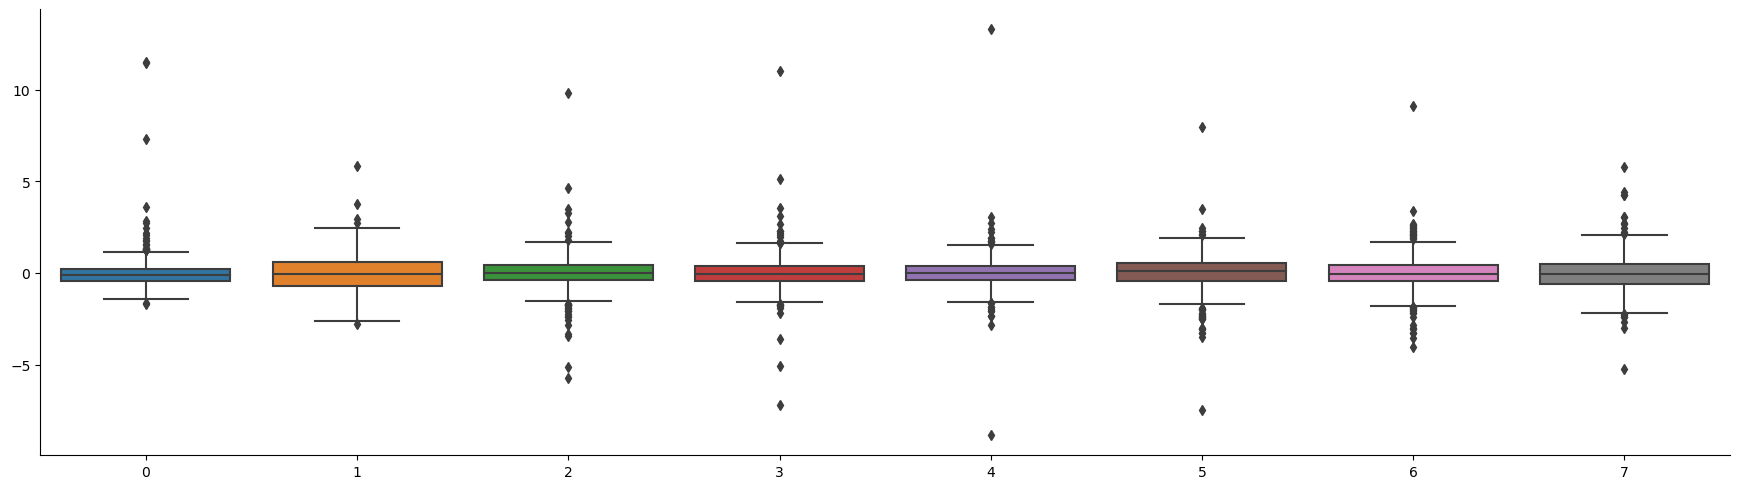

In [126]:
sns.catplot(data = pd.DataFrame( first8_ready), kind='box', aspect=3.5)

plt.show()

In [127]:
first8_hclust_ward = hierarchy.ward( first8_ready )

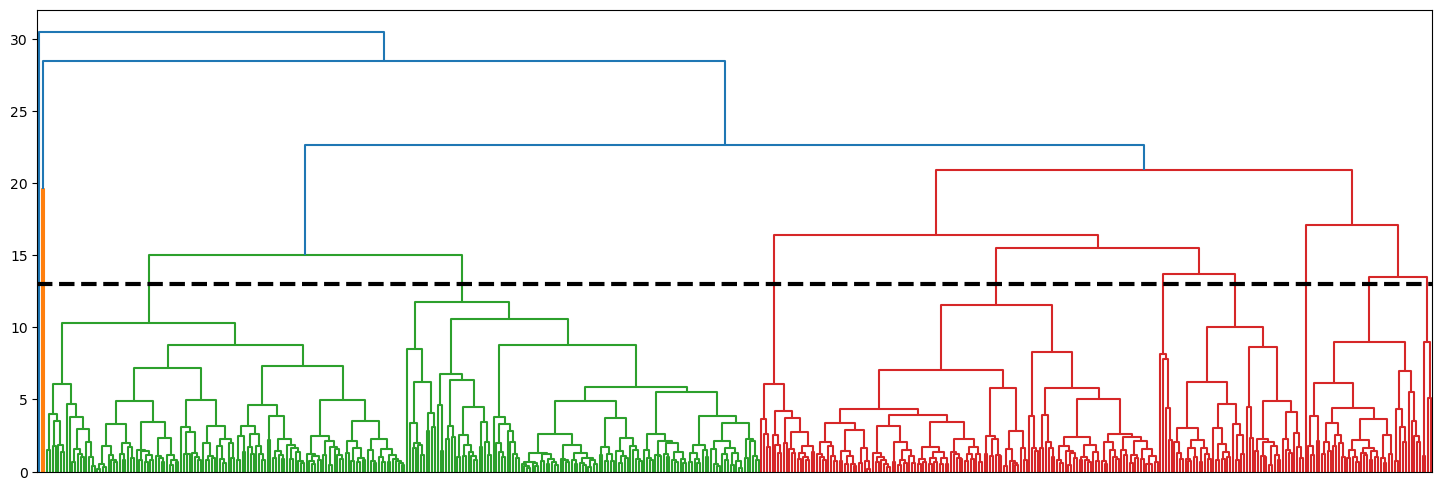

In [128]:
fig = plt.figure( figsize=(18,6) )

dn = hierarchy.dendrogram( first8_hclust_ward, no_labels=True )

plt.axhline(y=13, c='k', linestyle='--', linewidth=3)

plt.show()

In [129]:
first8_ward_cut_11 = hierarchy.cut_tree( first8_hclust_ward, n_clusters=11)

In [130]:
first8_df['sector'] = rest_df.sector.copy()
first8_df['symbol'] = rest_df.symbol.copy()

In [131]:
first8_df['hclust_11'] = pd.Series(first8_ward_cut_11.ravel(), index=first8_df.index)

first8_df['hclust_11'] = first8_df.hclust_11.astype('category')

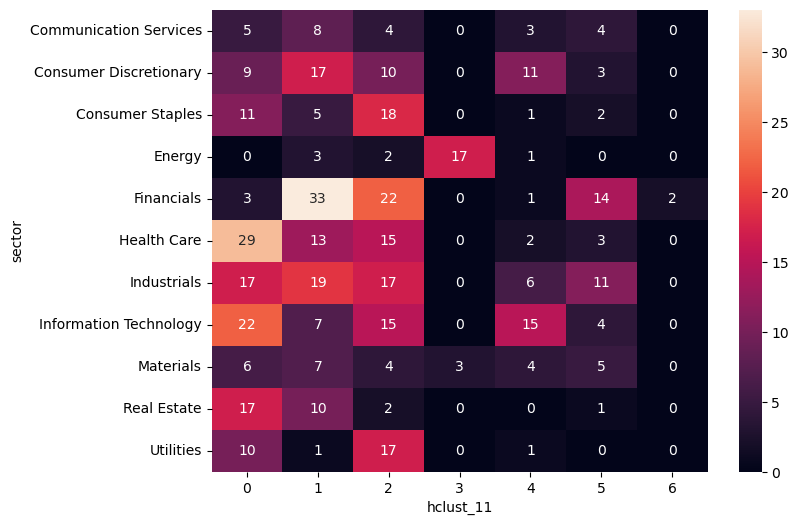

In [132]:
fig, ax = plt.subplots(figsize=(8,6))

sns.heatmap(pd.crosstab( first8_df.sector, first8_df.hclust_11, margins=False),
            annot=True, annot_kws={'size': 10})

plt.show()

From the above figure we can clearly distinguish the enery sector with `cluster==3`.

We can also see the the `cluster==4` mostly has companies from Information Technology and Consumer Discretionary sector. Not aware if both those sectors go with each other.

In [133]:
first8_df.loc[ (first8_df.hclust_11 == 4) & ( (first8_df.sector == 'Information Technology') |  (first8_df.sector == 'Consumer Discretionary') )].loc[:, ['sector', 'symbol']]

,sector,symbol
27,Information Technology,AMAT
42,Consumer Discretionary,APTV
73,Consumer Discretionary,BWA
86,Information Technology,CDW
132,Consumer Discretionary,DHI
141,Consumer Discretionary,DRI
160,Information Technology,EPAM
175,Consumer Discretionary,F
203,Consumer Discretionary,GM
271,Consumer Discretionary,LEN
